# Olist Customer Segmentation Model

## Table of Contents

1. [CRISP-DM](#1-CRISP-DM)
2. [Data Preprocessing](#2-Data-Preprocessing)
3. [Exploratory Data Analysis](#3-Exploratory-Data-Analysis)
4. [Machine Learning Modelling](#4-Machine-Learning-Modelling)
5. [Result Evaluation + Interpretation](#5-Result-Evaluation-+-Interpretation)
6. [Members’ Contribution](#6-Members’-Contribution)

## 1 CRISP-DM
\
&nbsp;
![alt text](crisp_dm_cycle.png "CRISP_DM")



### Phase 1: Business Understanding

1. Data Mining Goals

    * To build a customer segmentation model based on their behavioral data (spending, product usage etc.)
\
&nbsp;
\
&nbsp;
2. Business Objectives

    * To increase customer retention and loyalty
    * To fulfil customer's needs with recommendation system
    * To boost up revenue and expand market shares
\
&nbsp;
\
&nbsp;
3. Business Background

    * Founded in 2015, a Brazilian e-commerce platform
    * Olist works to connect small retailers to major e-commerce sites,     enabling the latter to increase their sales through large e-commerce platforms
    * Olist's software and list their products in their software, which Olist will post to the major e-commerce sites for sale under its own name
\
&nbsp;
\
&nbsp;
4. Situation Assessment

    * Business: Inadequate personalized recommendation system
    * Seller: Lesser profit as e-commerce platform takes higher percentage of profit sharing.
    * Customer:
        - Logistic delivery timeliness problem
        - Unattractive discounts
        - Limited suppliers for certain types of product


### Phase 2: Data Understanding

1. Collect raw data: Fully understand the source of the data, determine the data carrier, data embodiment, and data storage location for these influencing factors. 
\
&nbsp;
2. Describe data: data description, preliminary understanding of data, simple description of data.
\
&nbsp;
3. Explore data: Probe for data meaning.
\
&nbsp;
4. Extract data: Analyze the information and knowledge hidden in the data. 

### Phase 3: Data Preparation

1. Data preparation: dataset and dataset description.
\
&nbsp;
2. Cleaning data: data cleaning, removing NA values from the dataset, dealing with missing values, dealing with outliers.
\
&nbsp;
3. Constructing data: deriving attributes, data transformation. 
\
&nbsp;
4. Integrating data: merging data needed at a later stage. 

![alt text](data_preparation.png "Data Analysis")

### Phase 4: Modelling

1. In this step, we use various techniques to segment the customer data into different groups based on patterns or similarities.
\
&nbsp;
2. Initially, dimensionality reduction technique i.e., Principal Component Analysis (PCA) is used to reduce 57 selected features by selecting features with the most variance. Then, new combination of principal components scoring (scores_pca) dataset is formulated.
\
&nbsp;
3. Then, we proceed to clustering algorithm technique i.e., K-Means clustering. Formulated PCA scores are then fitted with K-means. The method is then executed with a parameter specifying the number of clusters. The algorithm will then group the data points into the desired number of clusters, each having data points that are comparable to the previous cluster.
\
&nbsp;
4. As a result, segmented cluster components dataset is formulated as the final models.




### Phase 5: Evaluation

1. In this section, the resulted models are further evaluated using Silhouette score, Calinski-Harabasz index, and Davies-Bouldin index.
\
&nbsp;
2. Identify any patterns or trends in the data that can be used to target specific segments of customers
\
&nbsp;
3. Compare the segments to the overall population to identify any specific characteristics that set them apart
\
&nbsp;
4. For Silhouette score evaluation, between 2n to 5n clusters were compared for evaluation. As a result, 4n cluster appears to be the best as the thickness of the silhoutte plot is more uniform compared to others.
\
&nbsp;
5. In addition, Davies-Bouldin index evaluation too exhibits a similar cluster pattern. It is observed that choosing 4 clusters minimizes the similarity measure. This is also supported with the higher Calinski-Harabasz index score indicating that the clusters are well separated and compact.

### Phase 6: Deployment

1. Use the segments to create targeted marketing campaigns for different groups of customers
\
&nbsp;
2. Use the segments to inform product development and inventory management decisions
\
&nbsp;
3. Monitor the success of the segmentation by tracking changes in customer behavior and sales revenue

## 2 Data Pre-processing

In [32]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import folium

# Create a list to store data file names
olist_data = ['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', \
              'product_category_name_translation', 'products', 'sellers']

# Create a dictionary to store data
olist = {}

# Read CSV file and put in dataframe in olist dictionary
for data in olist_data:
    olist[data] = pd.read_csv("./Olist Dataset/"+data+".csv")

# Display each dataframe
# for data, df in olist.items():
#     print(data)
#     display(df.head())

# Name each dataframe
for data, df in olist.items():
    if data == 'customers':
        customers_df = df
    elif data == 'geolocation':
        geolocation_df = df
    elif data == 'order_items':
        order_items_df = df
    elif data == 'order_payments':
        order_payment_df = df
    elif data == 'order_reviews':
        reviews_df = df
    elif data == 'orders':
        order_df = df
    elif data == 'product_category_name_translation':
        prod_cat_translation_df = df
    elif data == 'products':
        product_df = df
    elif data == 'sellers':
        seller_df = df

In [33]:
#Define a function to find missing values and calculate the percentage of missing values
def missing_value(data,num):
    null_data = data.isnull().sum().sort_values(ascending=False) # of null values counted and sorted in descending order
    percent_1 = data.isnull().sum()/data.isnull().count() #Calculation of the percentage of null values
    missing_data = pd.concat([null_data, percent_1.apply(lambda x: format(x, '.2%'))],
                             axis=1, keys=['total missing', 'missing percentage'])
    print('\nThe number and percentage of missing values in this table are as follows：\n',missing_data.head(num))

### Olist Customer Geolocation

In [34]:
cust = customers_df

#Mapping State to readable string
full_state = {'SP': 'Sao Paulo', 'SC':'Santa Catarina' ,'MG':'Minas Gerais', 'PR':'Parana','RJ':'Rio de Janeiro', 'RS':'Rio Grande do Sul', 'PA':'Para','GO':'Goias',
                'ES':'Espirito Santo','BA':'Bahia','MA':'Maranhao', 'MS':'MotoGrosso do Sul', 'CE':'Ceara','DF':'Distrito Federal','RN':'Rio Grande do Norte','PE':'Pernambuco',
                'MT':'MatoGrosso','AM':'Amazonas','AP':'Amapa','AL':'Alagoas','RO':'Rondonia','PB':'Paraiba','TO':'Tocantins','PI':'Piaui','AC':'Acre','SE':'Sergipe','RR':'Roraima'}


cust ['full_state'] = cust['customer_state'].map(full_state)
#customers.to_csv('customers_v1.csv', index=False)

#Duplicate customer_zip_code_prefix and rename to geolocation_zip_code_prefix
cust['geolocation_zip_code_prefix'] = cust.loc[:, 'customer_zip_code_prefix']

#cust.shape

#Geolocation Dataset: This dataset contains the Brazilian zip codes and the latitude/longitude coordinates present within the area represented by the zip-code.
geo = geolocation_df

#Removing duplicated zip codes 
geo = geo.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')

#left join geolocations into customers and select relevant dataset
cust_geo=pd.merge(cust,geo, on='geolocation_zip_code_prefix', how='left')

cust_geo = cust_geo[['customer_id','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state','full_state','geolocation_lat','geolocation_lng', 'geolocation_city']]

#cust_geo.shape

#cust_geo.head()

# drop duplicate customers
cust_geo.drop_duplicates(subset='customer_unique_id', keep='first', inplace=True)

# set index
cust_geo_df = cust_geo.set_index('customer_unique_id')

# drop customer_id
cust_geo_df.drop('customer_id', axis=1, inplace=True)

# check dimension
print("Customers:", cust_geo_df.shape)

cust_geo_df = cust_geo_df.reset_index()

display(cust_geo_df.head())

Customers: (96096, 7)


,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,full_state,geolocation_lat,geolocation_lng,geolocation_city
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sao Paulo,-20.509897,-47.397866,franca
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Sao Paulo,-23.726853,-46.545746,sao bernardo do campo
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Sao Paulo,-23.527788,-46.660310,sao paulo
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Sao Paulo,-23.496930,-46.185352,mogi das cruzes
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sao Paulo,-22.987222,-47.151073,campinas


### Olist Products

In [64]:
products=product_df

##Correct typo in field names
products = products.rename({"product_name_lenght":"product_name_length","product_description_lenght":"product_description_length"}, axis='columns')
#products.head()

missing_value(products,9)

#Product table with missing values
products['product_category_name'] = products['product_category_name'].fillna('U')
products['product_photos_qty'] = products.loc[:,'product_photos_qty'].fillna(products.loc[:,'product_photos_qty'].mean())
products['product_weight_g'] = products.loc[:,'product_weight_g'].fillna(products.loc[:,'product_weight_g'].mean())
products['product_length_cm'] = products.loc[:,'product_length_cm'].fillna(products.loc[:,'product_length_cm'].mean())
products['product_height_cm'] = products.loc[:,'product_height_cm'].fillna(products.loc[:,'product_height_cm'].mean())
products['product_width_cm'] = products.loc[:,'product_width_cm'].fillna(products.loc[:,'product_width_cm'].mean())

#products.describe()
#products[products['product_weight_g']==0]

#Product table outlier replacement
products.loc[:,'product_weight_g'].replace(to_replace=0, value=products.loc[:,'product_weight_g'].mean(), inplace=True)
# products.describe()

#Product table delete duplicate rows
products= products.drop_duplicates(subset=['product_id'])
products = products.reset_index(drop=True)

#View the number of duplicate values in products
#print("Number of duplicate values in products",products.duplicated().sum())

#Import the dataset of “product_category_name_translation”
product_cate=prod_cat_translation_df
product_cate.head()

#missing_value(product_cate,2)

#Product category name translation table delete duplicate rows
product_cate = product_cate.drop_duplicates(subset=['product_category_name'])
product_cate = product_cate.reset_index(drop=True)

#Merge two tables
prdt=products.merge(product_cate,on='product_category_name',how='left')
prdt= prdt[['product_id','product_category_name','product_category_name_english','product_name_length','product_description_length','product_photos_qty','product_weight_g','product_length_cm', 'product_height_cm','product_width_cm']]
# prdt.head()

#Sales volume and total share of each product category
product_total=pd.DataFrame()
product_total=prdt['product_category_name_english'].value_counts()
product_totalDf=product_total.reset_index(drop=False)
product_totalDf['Percentage']=pd.Series(product_totalDf.loc[:,'product_category_name_english']/prdt.shape[0]).map(lambda x: format(x, '.2%'))
product_totalDf=product_totalDf.rename(columns={'product_category_name_english':'Product_Number'})
product_totalDf=product_totalDf.rename(columns={'index':'product_category_name_english'})
#product_totalDf

prdt_item=order_items_df.merge(prdt,on='product_id')

# check dimension
print("Products:", prdt_item.shape)
display(prdt_item.head())





The number and percentage of missing values in this table are as follows：
                             total missing missing percentage
product_category_name                 610              1.85%
product_name_length                   610              1.85%
product_description_length            610              1.85%
product_photos_qty                    610              1.85%
product_weight_g                        2              0.01%
product_length_cm                       2              0.01%
product_height_cm                       2              0.01%
product_width_cm                        2              0.01%
product_id                              0              0.00%
Products: (112650, 16)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool stuff,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool stuff,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool stuff,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool stuff,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool stuff,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [65]:
#The quantity of each product being sold by seller level.
prdt_seller=pd.DataFrame()
prdt_seller['seller_sells']=order_items_df['seller_id'].value_counts()
prdt_seller=prdt_seller.reset_index(drop=False)
prdt_seller=prdt_seller.rename(columns={'index':'seller_id'})
# prdt_seller

#To find out product category sold for each seller
#Apparently each seller only sell 1 product type. Eg: 1 seller ID with 10 different product ID, but all 
#these product ID are of same product category.
order_items_df=order_items_df.merge(prdt[['product_id','product_category_name_english']],on='product_id',how='left')


prd_sellers=pd.DataFrame()
prd_sellers=order_items_df[['seller_id','product_category_name_english']]
#display(prd_sellers.head())

#The number of sellers for each product category.
prd_sellers_df=prd_sellers.groupby("product_category_name_english")["seller_id"].describe()
prd_sellers_df=prd_sellers_df[['count']]
prd_sellers_df=prd_sellers_df.rename(columns={'count':'Seller_Number'})
#display(prd_sellers_df.head())

#No. of product types in each product category and the number of sellers in each product category. 
prd_seller_number=product_totalDf.merge(prd_sellers_df,on='product_category_name_english',how='left')


# check dimension
print("Product Category:", prd_seller_number.shape)
prd_seller_number


Product Category: (71, 4)


,product_category_name_english,Product_Number,Percentage,Seller_Number
0,bed bath table,3029,9.19%,11115
1,sports leisure,2867,8.70%,8641
2,furniture decor,2657,8.06%,8334
3,health beauty,2444,7.42%,9670
4,housewares,2335,7.09%,6964
5,auto,1900,5.77%,4235
6,computers accessories,1639,4.97%,7827
7,toys,1411,4.28%,4117
8,watches gifts,1329,4.03%,5991
9,telephony,1134,3.44%,4545


### Olist Sellers

In [66]:
#Sellers Dataset
sellers = seller_df
#sellers.head()

#Order_Items Dataset
#order_items_df.head()

seller_state_by_frequency = pd.DataFrame(sellers.seller_state.value_counts())
seller_state_by_frequency = seller_state_by_frequency.reset_index()
seller_state_by_frequency = seller_state_by_frequency.rename(columns = {"index" : "seller_state", "seller_state" : "frequency"})
seller_state_by_frequency = seller_state_by_frequency.sort_values(by = "seller_state")
#state_by_frequency = state_by_frequency.reset_index(drop = True)
#seller_state_by_frequency

# check dimension
#print("sellers:", sellers.shape)
#print("order_items:", order_items_df.shape)

#Check for duplicate values
# print("Number of duplicated values in seller_id",sellers.duplicated().sum())
# print("Number of duplicated values in order_items",order_items_df.duplicated().sum())

#Check for duplicate values
# print("Number of duplicated values in seller_id",sellers.duplicated().sum())
# print("Number of duplicated values in order_items",order_items_df.duplicated().sum())

# check whether the seller id is unique in sellers df
# print("Unique seller id count:", len(pd.unique(sellers['seller_id'])))
# print("Total seller id count:", len(sellers.index))

# check whether the order id is unique in order items df
# print("Unique order id count:", len(pd.unique(order_items_df['order_id'])))
# print("Total order id count:", len(order_items_df.index))

# check whether the seller id is unique in order items df
# print("Unique seller id count:", len(pd.unique(order_items_df['seller_id'])))
# print("Total seller id count:", len(order_items_df.index))

# pivot seller_ID by different aggregate values
seller_df = order_items_df[['seller_id', 'order_id','order_item_id','price','freight_value','product_category_name_english']].copy()
seller_df = pd.pivot_table(seller_df, index='seller_id', aggfunc= {'order_id': 'nunique','order_item_id': 'count','price': 'sum',
                                                                   'freight_value': 'sum','product_category_name_english':'first'})
seller_df.rename(columns  = {"order_id": "total_no_of_orders",
                     "order_item_id":"total_no_of_prods",
                     "product_category_name_english":"prod_category"},
                                 inplace = True)
seller_df = seller_df[['total_no_of_orders', 'total_no_of_prods', 'price','freight_value','prod_category']]
# display(seller_df.head())

#Check total count
# print("seller_df:", seller_df.shape)

##To find the average price and freight value by seller id
seller_avg_price_df = pd.pivot_table(seller_df, index='seller_id', aggfunc= {'price': 'mean', 'freight_value': 'mean'})
seller_avg_price_df.rename(columns  = {"price":"average_price","freight_value":"average_freight_value"},
                                 inplace = True)
round(seller_avg_price_df["average_freight_value"],2)
round(seller_avg_price_df["average_price"],2)
# seller_avg_price_df

##To merge the average price and freight value with seller dataset by seller id
seller_df_final = pd.merge(seller_df,seller_avg_price_df,on='seller_id')
seller_df_final = seller_df_final[['total_no_of_orders', 'total_no_of_prods' ,'price',
                                  'freight_value','average_price','average_freight_value','prod_category']]
# display(seller_df_final.head())
#Check total count
# print("seller_df_final", seller_df.shape)


# seller_df_final.describe()

#To merge geolocation table with seller_order_items table
seller_info=pd.merge(seller_df_final,sellers, on='seller_id', how='left')
display(seller_info.head())
#Check total count
print("seller_info:", seller_info.shape)



,seller_id,total_no_of_orders,total_no_of_prods,price,freight_value,average_price,average_freight_value,prod_category,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,3,3,2685.00,63.06,2685.00,63.06,small appliances,9080,santo andre,SP
1,001cca7ae9ae17fb1caed9dfb1094831,200,239,25080.03,8854.14,25080.03,8854.14,garden tools,29156,cariacica,ES
2,001e6ad469a905060d959994f1b41e4f,1,1,250.00,17.94,250.00,17.94,sports leisure,24754,sao goncalo,RJ
3,002100f778ceb8431b7a1020ff7ab48f,51,55,1234.50,793.66,1234.50,793.66,furniture decor,14405,franca,SP
4,003554e2dce176b5555353e4f3555ac8,1,1,120.00,19.38,120.00,19.38,None,74565,goiania,GO


seller_info: (3095, 11)


### Olist Orders

#### Orders

In [67]:
# data for orders
# display(order_df.head())
# display(order_payment_df.head())
# display(order_items_df.head())

# check dimension
# print("order_df:", order_df.shape)
# print("order_payment_df:", order_payment_df.shape)
# print("order_items_df:", order_items_df.shape)

# check missing values in orders
missing_value(order_df, 8)

# check whether the order id is unique in orders
print("Unique order count:", len(pd.unique(order_df['order_id'])))
print("Total order count:", len(order_df.index))

# fill missing value with 0
order_df.fillna(0, inplace = True)

# check missing values in orders
missing_value(order_df, 8)


The number and percentage of missing values in this table are as follows：
                                total missing missing percentage
order_delivered_customer_date           2965              2.98%
order_delivered_carrier_date            1783              1.79%
order_approved_at                        160              0.16%
order_id                                   0              0.00%
customer_id                                0              0.00%
order_status                               0              0.00%
order_purchase_timestamp                   0              0.00%
order_estimated_delivery_date              0              0.00%
Unique order count: 99441
Total order count: 99441

The number and percentage of missing values in this table are as follows：
                                total missing missing percentage
order_id                                   0              0.00%
customer_id                                0              0.00%
order_status                 

#### Order Payment

In [68]:
# check missing values in order payment
missing_value(order_payment_df, 5)

# check whether the order id is unique in order payment
# print("Unique order count:", len(pd.unique(order_payment_df['order_id'])))
# print("Total order count:", len(order_payment_df.index))

# check those record with duplicates order id in order payment
order_payment_df[order_payment_df.duplicated(['order_id'], keep=False)].sort_values(["order_id", "payment_sequential"], ascending = [True, True])

# replace those with payment installments = 0
order_payment_df['payment_installments'].replace(0, 1, inplace=True)

# pivot payment installments by payment type
installment_df = order_payment_df[['order_id', 'payment_type', 'payment_installments']].copy()
installment_df = pd.pivot_table(installment_df, index='order_id', columns='payment_type', aggfunc= {'payment_installments': 'sum'})
installment_df.fillna(0, inplace = True)
# display(installment_df.head())

# check the order payment row count
# print("Total order count:", len(installment_df.index))

# check columns of the pivot table (payment installments by payment type)
# print(installment_df.columns)

# pivot payment values by payment type
payment_value_df = order_payment_df[['order_id', 'payment_type', 'payment_value']].copy()
payment_value_df = pd.pivot_table(payment_value_df, index='order_id', columns='payment_type', aggfunc= {'payment_value': 'sum'})
payment_value_df.fillna(0, inplace = True)
# display(payment_value_df.head())

# check the order id count
# print("Total order count:", len(payment_value_df.index))

# merge installment and payment value
order_payment_df = installment_df.join(payment_value_df)
# display(order_payment_df.head())

# flattened order_payment_df
order_payment_df.columns = order_payment_df.columns.to_series().str.join('_')

# check columns after merged
# print(order_payment_df.columns)

# display(order_payment_df.head())

# add attribute to indicate whether the payment method is used in this order
order_payment_df['payment_boleto'] = order_payment_df['payment_installments_boleto'] > 0
order_payment_df['payment_credit_card'] = order_payment_df['payment_installments_credit_card'] > 0
order_payment_df['payment_debit_card'] = order_payment_df['payment_installments_debit_card'] > 0
order_payment_df['payment_not_defined'] = order_payment_df['payment_installments_not_defined'] > 0
order_payment_df['payment_voucher'] = order_payment_df['payment_installments_voucher'] > 0

# display(order_payment_df.head())

for data, df in olist.items():
    if data == 'order_payments':
        first_order_payment_df = df

# first payent method used for installments
first_order_payment_df = first_order_payment_df[first_order_payment_df['payment_sequential'] == 1]
first_order_payment_df.set_index('order_id', inplace = True)
first_order_payment_df = first_order_payment_df.drop(['payment_sequential', 'payment_installments', 'payment_value'], axis=1)

first_order_payment_df.rename(columns = {'payment_type':'first_payment_installment'}, inplace = True)
# display(first_order_payment_df.head())

# merge back to the order payment df
order_payment_df = order_payment_df.join(first_order_payment_df)
# display(order_payment_df.head())

# categorize different group of attributes for further integration
payment_method_list = ['payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_not_defined', 'payment_voucher']
payment_installments_list = ['payment_installments_boleto', 'payment_installments_credit_card', 'payment_installments_debit_card', 'payment_installments_not_defined', 'payment_installments_voucher']
payment_value_list = ['payment_value_boleto', 'payment_value_credit_card', 'payment_value_debit_card', 'payment_value_not_defined', 'payment_value_voucher']

# add number of distinct payment method used
order_payment_df['no_payment_type'] = order_payment_df[payment_method_list].sum(axis = 1)

# add total installments
order_payment_df['total_installments'] = order_payment_df[payment_installments_list].sum(axis = 1)

# display(order_payment_df)

def remove_last_comma(text):
    if text.endswith(','):
        text = text[:-1] + ''
    return text

# most used payment type
is_max_used_pt = order_payment_df[payment_installments_list].eq(order_payment_df[payment_installments_list].max(axis=1), axis=0)
result_max_used_pt = is_max_used_pt.dot(order_payment_df[payment_installments_list].columns + ",")
result_max_used_pt_df = result_max_used_pt.to_frame()
result_max_used_pt_df.columns = ['most_used_payment_type']
result_max_used_pt_df['most_used_payment_type'] = result_max_used_pt_df['most_used_payment_type'].apply(remove_last_comma)

# most paid payment type
is_max_paid_pt = order_payment_df[payment_value_list].eq(order_payment_df[payment_value_list].max(axis=1), axis=0)
result_max_paid_pt = is_max_paid_pt.dot(order_payment_df[payment_value_list].columns + ",")
result_max_paid_pt_df = result_max_paid_pt.to_frame()
result_max_paid_pt_df.columns = ['most_paid_payment_type']
result_max_paid_pt_df['most_paid_payment_type'] = result_max_paid_pt_df['most_paid_payment_type'].apply(remove_last_comma)

# display(is_max_used_pt.head())
# display(result_max_used_pt_df.head())

# display(is_max_paid_pt.head())
# display(result_max_paid_pt_df.head())


# merge result_max_used_pt_df and result_max_paid_pt_df to order_payment_df
order_payment_df = order_payment_df.join(result_max_used_pt_df)
order_payment_df = order_payment_df.join(result_max_paid_pt_df)

# replace payment_installments_ to empty string
order_payment_df['most_used_payment_type'] = order_payment_df['most_used_payment_type'].replace("payment_installments_", "", regex=True)
order_payment_df['most_paid_payment_type'] = order_payment_df['most_paid_payment_type'].replace("payment_value_", "", regex=True)

# replace _ with empty space
order_payment_df = order_payment_df.replace("_", " ", regex=True)

display(order_payment_df.head())


The number and percentage of missing values in this table are as follows：
                       total missing missing percentage
order_id                          0              0.00%
payment_sequential                0              0.00%
payment_type                      0              0.00%
payment_installments              0              0.00%
payment_value                     0              0.00%


,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type
order_id,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.0,72.19,0.0,0.0,0.0,False,True,False,False,False,credit card,1,2.0,credit card,credit card
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.0,259.83,0.0,0.0,0.0,False,True,False,False,False,credit card,1,3.0,credit card,credit card
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.0,216.87,0.0,0.0,0.0,False,True,False,False,False,credit card,1,5.0,credit card,credit card
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.0,25.78,0.0,0.0,0.0,False,True,False,False,False,credit card,1,2.0,credit card,credit card
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.0,218.04,0.0,0.0,0.0,False,True,False,False,False,credit card,1,3.0,credit card,credit card


#### Order Items

In [69]:
# check missing values in order items
missing_value(order_items_df, 7)

# check whether each order id only one shipping limit date
order_shipping_limit_df = order_items_df[['order_id', 'shipping_limit_date']].copy()
order_shipping_limit_df.drop_duplicates()

# check whether the order id is unique in order shipping limit
# print("Unique order count:", len(pd.unique(order_shipping_limit_df['order_id'])))
# print("Total order count:", len(order_shipping_limit_df.index))

# pivot with multiple aggregations
order_items_agg_df = order_items_df[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']].copy()
order_items_agg_df = order_items_agg_df.groupby('order_id').aggregate({'product_id': ['count', 'nunique'], 'seller_id': 'nunique', 'price': 'sum', 'freight_value': 'sum'})
# display(order_items_agg_df.head())

# check the order id count
# print("Total order count:", len(order_items_agg_df.index))

# flattened order_items_agg_df
order_items_agg_df.columns = order_items_agg_df.columns.to_series().str.join('_')

# check columns after merged
# print(order_items_agg_df.columns)

# display(order_items_agg_df.head())

# rename columns in order_items_agg_df
order_items_agg_df.rename(columns = {'product_id_count':'no_products','product_id_nunique':'no_unique_products', 'seller_id_nunique':'no_sellers_dealt', 'price_sum':'total_price', 'freight_value_sum':'total_freight_value'}, inplace = True)

display(order_items_agg_df.head())


The number and percentage of missing values in this table are as follows：
                                total missing missing percentage
product_category_name_english           1627              1.44%
order_id                                   0              0.00%
order_item_id                              0              0.00%
product_id                                 0              0.00%
seller_id                                  0              0.00%
shipping_limit_date                        0              0.00%
price                                      0              0.00%


,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,1,1,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,1,1,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,1,1,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,199.90,18.14


#### Orders (Master Table)

In [70]:
#Innerjoin to remove orders with no payments
orders_master_df=pd.merge(order_df,order_payment_df.reset_index(), how="inner", on='order_id')

#Innerjoin to remove orders with no items bought
orders_master_df=pd.merge(orders_master_df,order_items_agg_df.reset_index(), how="inner", on='order_id')
# orders_master_df.shape

# check record with any NAs
orders_master_df[orders_master_df.isnull().any(axis=1)]

# fill na with 0
orders_master_df.fillna(0, inplace = True)

# display(orders_master_df.head())

# convert some columns to integer
orders_master_df[['payment_installments_boleto', 'payment_installments_credit_card', 'payment_installments_debit_card', 'payment_installments_not_defined', 'payment_installments_voucher', 'no_payment_type', 'total_installments', 'no_products', 'no_unique_products', 'no_sellers_dealt']] = \
orders_master_df[['payment_installments_boleto', 'payment_installments_credit_card', 'payment_installments_debit_card', 'payment_installments_not_defined', 'payment_installments_voucher', 'no_payment_type', 'total_installments', 'no_products', 'no_unique_products', 'no_sellers_dealt']].astype(int)
print("order_info:", orders_master_df.shape)
display(orders_master_df.head())


order_info: (98665, 33)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0,1,0,0,2,0.00,18.12,0.0,0.0,20.59,False,True,False,False,True,credit card,2,3,voucher,voucher,1,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,0,0,0,0,141.46,0.00,0.0,0.0,0.00,True,False,False,False,False,boleto,1,1,boleto,boleto,1,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0,3,0,0,0,0.00,179.12,0.0,0.0,0.00,False,True,False,False,False,credit card,1,3,credit card,credit card,1,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0,1,0,0,0,0.00,72.20,0.0,0.0,0.00,False,True,False,False,False,credit card,1,1,credit card,credit card,1,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0,1,0,0,0,0.00,28.62,0.0,0.0,0.00,False,True,False,False,False,credit card,1,1,credit card,credit card,1,1,1,19.90,8.72


### Olist Customer Timeframe

In [72]:
#reset index
order_df = order_df.reset_index()
# order_df

# merge customer and orders
cs_tf_df = pd.merge(customers_df, order_df, on='customer_id', how='left')

# drop unused columns
drop_cols = ['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
cs_tf_df.drop(drop_cols, axis=1, inplace=True)
# cs_tf_df.head()

# convert order_purchase_timestamp into datetime
cs_tf_df['order_purchase_timestamp'] = pd.to_datetime(cs_tf_df['order_purchase_timestamp'])

# extract date into a new column
cs_tf_df['order_dt'] = cs_tf_df['order_purchase_timestamp'].dt.date

# extract time into a new column
cs_tf_df['order_time'] = cs_tf_df['order_purchase_timestamp'].dt.time

# extract year and month from date
cs_tf_df['order_yr'] = cs_tf_df['order_purchase_timestamp'].dt.year
cs_tf_df['order_mth'] = cs_tf_df['order_purchase_timestamp'].dt.month
# cs_tf_df.head()

# categorize order time into time of day
cs_tf_df['time_of_day'] = pd.cut(cs_tf_df['order_purchase_timestamp'].dt.hour,
                                 bins=[0, 6, 12, 18, 24],
                                 labels=['night', 'morning', 'afternoon', 'evening'],
                                 right=False,
                                 include_lowest=True
                                )

# categorize order date into quarters (3M)
cs_tf_df['order_dt_3M'] = pd.PeriodIndex(cs_tf_df['order_dt'], freq='Q')

# categorize order date into half year (6M)
cs_tf_df['order_dt_6M'] = cs_tf_df['order_yr'].astype(str) + 'H' + cs_tf_df['order_mth'].gt(6).add(1).astype(str)
# cs_tf_df.head()

# pivot by order year
order_yr_df = cs_tf_df[['order_id', 'customer_unique_id', 'order_yr']].copy()
order_yr_df = pd.pivot_table(order_yr_df, index='customer_unique_id', columns='order_yr', aggfunc= {'order_id': 'count'})
order_yr_df.fillna(0, inplace = True)
order_yr_df.reset_index(inplace = True)
order_yr_df.columns = ['customer_unique_id', 'total_orders_2016', 'total_orders_2017', 'total_orders_2018']

# display(order_yr_df.head())

# average orders per month for each year
order_yr_df['avg_orders_per_month_2017'] = order_yr_df['total_orders_2017']/12
order_yr_df['avg_orders_per_month_2018'] = order_yr_df['total_orders_2018']/12

# display(order_yr_df.head())

# only take year 2017 & 2018
order_3M_df = cs_tf_df[cs_tf_df['order_yr'] > 2016]

# pivot by order quarters (3M)
order_3M_df = order_3M_df[['order_id', 'customer_unique_id', 'order_dt_3M']].copy()
#Count number of orders in each Quarter by customer level.
order_3M_df = pd.pivot_table(order_3M_df, index='customer_unique_id', columns='order_dt_3M', aggfunc= {'order_id': 'count'})
order_3M_df.fillna(0, inplace = True)
order_3M_df.reset_index(inplace = True)
order_3M_df.columns = ['customer_unique_id', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
                       '2018Q2', '2018Q3', '2018Q4']

# display(order_3M_df.head())

# average 3 months for year 2017 & 2018
#Averagely how many orders made by customer quarterly?
order_3M_df['avg_orders_3M_2017'] = (order_3M_df['2017Q1'] + order_3M_df['2017Q2'] + order_3M_df['2017Q3'] + 
                                     order_3M_df['2017Q4'])/4
order_3M_df['avg_orders_3M_2018'] = (order_3M_df['2018Q1'] + order_3M_df['2018Q2'] + order_3M_df['2018Q3'] + 
                                     order_3M_df['2018Q4'])/4

# display(order_3M_df.head())

# only take year 2017 & 2018
order_6M_df = cs_tf_df[cs_tf_df['order_yr'] > 2016]

# pivot by order quarters (6M)
order_6M_df = order_6M_df[['order_id', 'customer_unique_id', 'order_dt_6M']].copy()
#Count number of orders on a half year basis by customer level.
order_6M_df = pd.pivot_table(order_6M_df, index='customer_unique_id', columns='order_dt_6M', aggfunc= {'order_id': 'count'})
order_6M_df.fillna(0, inplace = True)
order_6M_df.reset_index(inplace = True)
order_6M_df.columns = ['customer_unique_id', '2017H1', '2017H2', '2018H1', '2018H2']

# display(order_6M_df.head())

# average 6 months for year 2017 & 2018
#Averagely how many orders made by customer half-yearly?
order_6M_df['avg_orders_6M_2017'] = (order_6M_df['2017H1'] + order_6M_df['2017H2'])/2
order_6M_df['avg_orders_6M_2018'] = (order_6M_df['2018H1'] + order_6M_df['2018H2'])/2

# display(order_6M_df.head())

# pivot by time of day
#How many orders made by session of the day?
order_tod_df = cs_tf_df[['order_id', 'customer_unique_id', 'time_of_day']].copy()
order_tod_df = pd.pivot_table(order_tod_df, index='customer_unique_id', columns='time_of_day', aggfunc= {'order_id': 'count'})
order_tod_df.fillna(0, inplace = True)
order_tod_df.reset_index(inplace = True)
order_tod_df.columns = ['customer_unique_id', 'total_orders_night', 'total_orders_morning', 'total_orders_afternoon', 
                        'total_orders_evening']

# display(order_tod_df.head())

# drop unused columns
# order_3M_df1 = order_3M_df.drop(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1','2018Q2', '2018Q3', '2018Q4'], axis=1, inplace=True)
# order_6M_df1 = order_6M_df.drop(['2017H1', '2017H2', '2018H1', '2018H2'], axis=1, inplace=True)

# combine all tables together
cs_tf_fnl_df = order_yr_df.merge(order_3M_df, on = 'customer_unique_id',how ='left')
cs_tf_fnl_df = cs_tf_fnl_df.merge(order_6M_df, on = 'customer_unique_id',how ='left')
cs_tf_fnl_df = cs_tf_fnl_df.merge(order_tod_df, on = 'customer_unique_id',how ='left')

print("customer_info:", cs_tf_fnl_df.shape)
display(cs_tf_fnl_df.head())

customer_info: (96096, 26)


,customer_unique_id,total_orders_2016,total_orders_2017,total_orders_2018,avg_orders_per_month_2017,avg_orders_per_month_2018,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,avg_orders_3M_2017,avg_orders_3M_2018,2017H1,2017H2,2018H1,2018H2,avg_orders_6M_2017,avg_orders_6M_2018,total_orders_night,total_orders_morning,total_orders_afternoon,total_orders_evening
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,1.0,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.25,0.0,0.0,1.0,0.0,0.0,0.5,0,1,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,1.0,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.25,0.0,0.0,1.0,0.0,0.0,0.5,0,1,0,0
2,0000f46a3911fa3c0805444483337064,0.0,1.0,0.0,0.083333,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,1.0,0.0,0.0,0.0,0.5,0.0,0,0,0,1
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,1.0,0.0,0.083333,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,1.0,0.0,0.0,0.5,0.0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,0.0,1.0,0.0,0.083333,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,1.0,0.0,0.0,0.5,0.0,0,0,0,1


### Olist Order Reviews

In [73]:
# To read the order review dataset
order_review = reviews_df
# order_review.head()

# To check the columns with missing values in order dataset
# order_review.isna().sum()

# To find the length of the review messages
order_review["Review Message Length"]= order_review['review_comment_message'].str.len()
order_review['Review Message Length'].fillna(0, inplace = True)
# order_review.head()

# Dropping the review comment title and review comment messages since there are a lot of missing values
order_review.drop(columns=['review_comment_title', 'review_comment_message'])

# To check the duplicate review id
duplicate = order_review[order_review.duplicated(['review_id'])]
# print("Duplicate Rows :")
# duplicate.head()
## 814 duplicate review id were found

# To check the duplicate order id
duplicate = order_review[order_review.duplicated(['order_id'])]
# print("Duplicate Rows :")
# duplicate.head()
## 551 duplicate order id were found

# To read the order dataset
order = order_df
# order.head()

# To check the duplicate order id
duplicate = order[order.duplicated(['order_id'])]
# print("Duplicate Rows :")
# duplicate.head()
## No duplicate order id were found

# To merge the orders and reviews data by order id
result = pd.merge(order_review,order,on='order_id')
# result.head()

# To read customer dataset
customer = customers_df
# customer.head()

# To merge the orders, reviews and customers dataset
result1 = pd.merge(result,customer,on='customer_id')
# result1.head()

# To group by the customer unique id, find count and average review scores and average review message length
review_master= result1.groupby(['customer_unique_id'], as_index=False).agg({'review_score': ['count','mean'], 'review_creation_date': 'first', 'review_answer_timestamp': 'first', 'Review Message Length': 'mean'})
review_master.columns = review_master.columns.to_series().str.join('_')
review_master.rename(columns = {'customer_unique_id_':'customer_unique_id','review_score_count':'total_review_count','review_score_mean':'avg_review_score','review_creation_date_first':'first_review_creation_date','review_answer_timestamp_first':'first_review_answer_timestamp','Review Message Length_mean':'avg_review_msg_length'}, inplace = True)
print("review_info:", review_master.shape)
display(review_master.head())

review_info: (95380, 6)


,customer_unique_id,total_review_count,avg_review_score,first_review_creation_date,first_review_answer_timestamp,avg_review_msg_length
0,0000366f3b9a7992bf8c76cfdf3221e2,1,5.0,2018-05-17 00:00:00,2018-05-21 13:44:48,111.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,4.0,2018-05-11 00:00:00,2018-05-11 22:29:25,0.0
2,0000f46a3911fa3c0805444483337064,1,3.0,2017-04-06 00:00:00,2017-04-07 01:19:44,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,4.0,2017-11-02 00:00:00,2017-11-03 00:17:51,12.0
4,0004aac84e0df4da2b147fca70cf8255,1,5.0,2017-11-28 00:00:00,2017-12-02 22:29:35,0.0


### Olist Customer Level

In [74]:
# join orders_master_df and customers_df
cs_order_df_main = pd.merge(orders_master_df.reset_index(), customers_df[['customer_id', 'customer_unique_id']], how='inner', on='customer_id')

# check dimension
# print("Dimension:", cs_order_df_main.shape)

# display(cs_order_df_main.head())

# group cd_order_df by customer_unique_id
cs_order_df = cs_order_df_main.groupby('customer_unique_id').aggregate({
    'order_id': 'count', 
    'no_products': ['sum', 'mean'], 
    'no_unique_products': 'mean', 
    'no_sellers_dealt': 'mean', 
    'total_price': ['sum', 'mean'],
    'total_freight_value': ['sum', 'mean'], 
    'total_installments': 'mean',
    'payment_installments_boleto': 'mean',
    'payment_installments_credit_card': 'mean',
    'payment_installments_debit_card': 'mean',
    'payment_installments_not_defined': 'mean',
    'payment_installments_voucher': 'mean',
    'payment_value_boleto': 'mean',
    'payment_value_credit_card': 'mean',
    'payment_value_debit_card': 'mean',
    'payment_value_not_defined': 'mean',
    'payment_value_voucher': 'mean',
})

# display(cs_order_df.head())

# change column names
cs_order_df.columns = ['total_orders', 'total_products', 'avg_product_per_order', 'avg_unique_product_per_order',
                       'avg_sellers_dealt_per_order', 'total_price', 'avg_price_per_order', 'total_freight_value',
                       'avg_freight_value_per_order', 'avg_installment_per_order', 'avg_payment_installments_boleto',
                       'avg_payment_installments_credit_card', 'avg_payment_installments_debit_card',
                       'avg_payment_installments_not_defined', 'avg_payment_installments_voucher',
                       'avg_payment_value_boleto', 'avg_payment_value_credit_card', 'avg_payment_value_debit_card',
                       'avg_payment_value_not_defined', 'avg_payment_value_voucher']

# check columns after merged
# print(cs_order_df.columns)

# whether the payment method is used by customer
cs_order_df['payment_boleto'] = cs_order_df['avg_payment_installments_boleto'] > 0
cs_order_df['payment_credit_card'] = cs_order_df['avg_payment_installments_credit_card'] > 0
cs_order_df['payment_debit_card'] = cs_order_df['avg_payment_installments_debit_card'] > 0
cs_order_df['payment_not_defined'] = cs_order_df['avg_payment_installments_not_defined'] > 0
cs_order_df['payment_voucher'] = cs_order_df['avg_payment_installments_voucher'] > 0

# add number of distinct payment method used
payment_method_list = ['payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_not_defined', 'payment_voucher']
cs_order_df['no_payment_type'] = cs_order_df[payment_method_list].sum(axis = 1)

# display(cs_order_df.head())

cs_payment_installments_list = ['avg_payment_installments_boleto', 'avg_payment_installments_credit_card', 'avg_payment_installments_debit_card', 'avg_payment_installments_not_defined', 'avg_payment_installments_voucher']
cs_payment_value_list = ['avg_payment_value_boleto', 'avg_payment_value_credit_card', 'avg_payment_value_debit_card', 'avg_payment_value_not_defined', 'avg_payment_value_voucher']

# most used payment type
#Get max value
cs_is_max_used_pt = cs_order_df[cs_payment_installments_list].eq(cs_order_df[cs_payment_installments_list].max(axis=1), axis=0)
#
cs_max_used_pt = cs_is_max_used_pt.dot(cs_order_df[cs_payment_installments_list].columns + ",")
cs_max_used_pt_df = cs_max_used_pt.to_frame()
cs_max_used_pt_df.columns = ['most_used_payment_type']
cs_max_used_pt_df['most_used_payment_type'] = cs_max_used_pt_df['most_used_payment_type'].apply(remove_last_comma)

# most paid payment type
cs_is_max_paid_pt = cs_order_df[cs_payment_value_list].eq(cs_order_df[cs_payment_value_list].max(axis=1), axis=0)
cs_max_paid_pt = cs_is_max_paid_pt.dot(cs_order_df[cs_payment_value_list].columns + ",")
cs_max_paid_pt_df = cs_max_paid_pt.to_frame()
cs_max_paid_pt_df.columns = ['most_paid_payment_type']
cs_max_paid_pt_df['most_paid_payment_type'] = cs_max_paid_pt_df['most_paid_payment_type'].apply(remove_last_comma)

# merge cs_max_used_pt_df and cs_max_paid_pt_df to cs_order_df
cs_order_df = cs_order_df.join(cs_max_used_pt_df)
cs_order_df = cs_order_df.join(cs_max_paid_pt_df)

# replace payment_installments_ to empty string
cs_order_df['most_used_payment_type'] = cs_order_df['most_used_payment_type'].replace("avg_payment_installments_", "", regex=True)
cs_order_df['most_paid_payment_type'] = cs_order_df['most_paid_payment_type'].replace("avg_payment_value_", "", regex=True)

# display(cs_order_df.head())

# most frequent first payment method used by customer
most_freq_first_pt_df = cs_order_df_main.groupby(['customer_unique_id'])['first_payment_installment'].apply(lambda x: x.value_counts().index[0])
most_freq_first_pt_df = most_freq_first_pt_df.to_frame()

# display(most_freq_first_pt_df.head())

# set column name
most_freq_first_pt_df.columns = ['most_freq_first_payment_method']

# merge cs_order_df and most_freq_first_pt_df
cs_order_df = cs_order_df.join(most_freq_first_pt_df)

# order
for data, df in olist.items():
    if data == 'order_items':
        order_items_df = df
    if data == 'orders':
        orders_df = df

# Get total_unique_products and total_sellers_dealt at customer level
cs_order_item_df = pd.merge(orders_df, order_items_df, how='inner', on='order_id')
cs_order_item_df = pd.merge(customers_df, cs_order_item_df, how='inner', on='customer_id')
cs_order_item_df = cs_order_item_df.groupby('customer_unique_id').aggregate({
    'product_id': 'nunique',
    'seller_id': 'nunique'
})

# rename columns
cs_order_item_df.columns = ['total_unique_products', 'total_sellers_dealt']

# display(cs_order_item_df.head())

# merge cs_order_df and cs_order_item_df
cs_order_df = cs_order_df.join(cs_order_item_df)

# replace _ with empty space
cs_order_df = cs_order_df.replace("_", " ", regex=True)

# join cs_order_df and cust_geo_df
cs_order_df = cs_order_df.join(cust_geo_df)

# merge cs_order_df and with cs_tf_fnl_df
cs_df = cs_order_df.join(cs_tf_fnl_df.set_index('customer_unique_id'))

# merge cs_df and review_master
review_master.set_index('customer_unique_id', inplace = True)
cs_df = cs_df.join(review_master.drop(['first_review_creation_date', 'first_review_answer_timestamp'], axis = 1))

# display(cs_df.head())

# missing_value(cs_df, 38)

# fill in missing values
cs_df['geolocation_city'] = cs_df['geolocation_city'].fillna('Missing')
cs_df.fillna(0, inplace=True)

# check data types in cs_df
# cs_df.dtypes

col_list = ['avg_product_per_order', 'avg_unique_product_per_order', 'avg_sellers_dealt_per_order'
            , 'avg_installment_per_order', 'avg_payment_installments_boleto', 'avg_payment_installments_credit_card'
            , 'avg_payment_installments_debit_card', 'avg_payment_installments_not_defined'
            , 'avg_payment_installments_voucher', 'total_orders_2016', 'total_orders_2017', 'total_orders_2018'
            , 'total_review_count']

#convert columns to integer
cs_df[col_list] = cs_df[col_list].astype(int)

print("Dimension: ", cs_df.shape)

display(cs_df.head())

Dimension:  (95419, 66)


,total_orders,total_products,avg_product_per_order,avg_unique_product_per_order,avg_sellers_dealt_per_order,total_price,avg_price_per_order,total_freight_value,avg_freight_value_per_order,avg_installment_per_order,avg_payment_installments_boleto,avg_payment_installments_credit_card,avg_payment_installments_debit_card,avg_payment_installments_not_defined,avg_payment_installments_voucher,avg_payment_value_boleto,avg_payment_value_credit_card,avg_payment_value_debit_card,avg_payment_value_not_defined,avg_payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,no_payment_type,most_used_payment_type,most_paid_payment_type,most_freq_first_payment_method,total_unique_products,total_sellers_dealt,customer_zip_code_prefix,customer_city,customer_state,full_state,geolocation_lat,geolocation_lng,geolocation_city,total_orders_2016,total_orders_2017,total_orders_2018,avg_orders_per_month_2017,avg_orders_per_month_2018,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,avg_orders_3M_2017,avg_orders_3M_2018,2017H1,2017H2,2018H1,2018H2,avg_orders_6M_2017,avg_orders_6M_2018,total_orders_night,total_orders_morning,total_orders_afternoon,total_orders_evening,total_review_count,avg_review_score,avg_review_msg_length
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1,1,1,1,129.90,129.90,12.00,12.00,8,0,8,0,0,0,0.0,141.90,0.0,0.0,0.0,False,True,False,False,False,1,credit card,credit card,credit card,1,1,7787,cajamar,SP,Sao Paulo,-23.335331,-46.828647,cajamar,0,0,1,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.25,0.0,0.0,1.0,0.0,0.0,0.5,0,1,0,0,1,5.0,111.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,1,1,1,18.90,18.90,8.29,8.29,1,0,1,0,0,0,0.0,27.19,0.0,0.0,0.0,False,True,False,False,False,1,credit card,credit card,credit card,1,1,6053,osasco,SP,Sao Paulo,-23.567395,-46.792957,osasco,0,0,1,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.25,0.0,0.0,1.0,0.0,0.0,0.5,0,1,0,0,1,4.0,0.0
0000f46a3911fa3c0805444483337064,1,1,1,1,1,69.00,69.00,17.22,17.22,8,0,8,0,0,0,0.0,86.22,0.0,0.0,0.0,False,True,False,False,False,1,credit card,credit card,credit card,1,1,88115,sao jose,SC,Santa Catarina,-27.543787,-48.625680,sao jose,0,1,0,0.083333,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,1.0,0.0,0.0,0.0,0.5,0.0,0,0,0,1,1,3.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,1,1,1,1,1,25.99,25.99,17.63,17.63,4,0,4,0,0,0,0.0,43.62,0.0,0.0,0.0,False,True,False,False,False,1,credit card,credit card,credit card,1,1,66812,belem,PA,Para,-1.311011,-48.482884,belem,0,1,0,0.083333,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,1.0,0.0,0.0,0.5,0.0,0,0,0,1,1,4.0,12.0
0004aac84e0df4da2b147fca70cf8255,1,1,1,1,1,180.00,180.00,16.89,16.89,6,0,6,0,0,0,0.0,196.89,0.0,0.0,0.0,False,True,False,False,False,1,credit card,credit card,credit card,1,1,18040,sorocaba,SP,Sao Paulo,-23.504368,-47.466156,sorocaba,0,1,0,0.083333,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,1.0,0.0,0.0,0.5,0.0,0,0,0,1,1,5.0,0.0


## 3 Exploratory Data Analysis

In [75]:
# define color theme
colors = ['#3A5FCD', '#8470FF', '#7A378B', '#EE6363', '#FF6347', '#FFA07A','#FFEFDB']
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("magma")

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

### Product Level

#### Top 10 selling product categories as a percentage of total orders 20,745

The pie chart below is a break down of the top 10 and non-top 10 product category in terms of sales.

Top 10 selling product categories as a percentage of total orders: 64.0%
Non-Top 10 selling product categories as a percentage of total orders: 36.0%


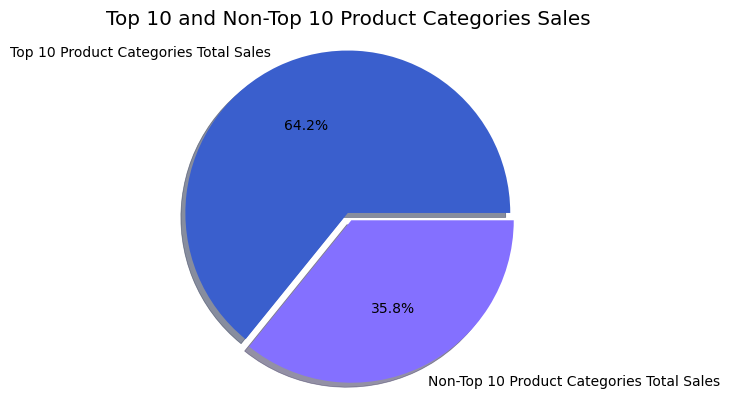

In [76]:
t=pd.DataFrame()
t=product_totalDf.head(10)
b=product_totalDf.drop([0,1,2,3,4,5,6,7,8,9])
T=[t['Product_Number'].sum(),b['Product_Number'].sum()]
Total_Percentage1=str(round(t['Product_Number'].sum()/product_totalDf['Product_Number'].sum(),2)*100)+'%'
print('Top 10 selling product categories as a percentage of total orders:',Total_Percentage1)
Total_Percentage2=str(round(b['Product_Number'].sum()/product_totalDf['Product_Number'].sum(),2)*100)+'%'
print('Non-Top 10 selling product categories as a percentage of total orders:',Total_Percentage2)

##The pie chart for top 10 and non-top 10 product category.
plt.figure()
color = colors
plt.pie(T,
       explode=[0.05,0.0],
       autopct='%1.1f%%',
       colors = colors,
       labels = ['Top 10 Product Categories Total Sales','Non-Top 10 Product Categories Total Sales'],      
       shadow=True,
       startangle=0,
       radius=1)
plt.axis('equal')
plt.title('Top 10 and Non-Top 10 Product Categories Sales')
#Display graphics
plt.show()

To zoom in to the top 10 selling product categories, the products that are in high demands are the furnitures, sports equipments and beauty care products.

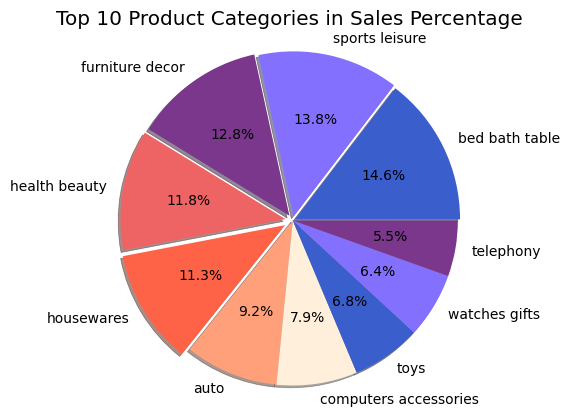

In [77]:
#This pie chart shows us the top ten selling products as a percentage of the total sales of these ten products
plt.figure()
color = colors
plt.pie(product_totalDf['Product_Number'].head(10),
       explode=[0.03,0.05,0.07,0.09,0.11,0.0,0.0,0.0,0.0,0.0],
       autopct='%1.1f%%',
       colors = colors,
       labels = ['bed bath table','sports leisure','furniture decor','health beauty','housewares','auto','computers accessories','toys','watches gifts','telephony'],      shadow=True,
       startangle=0,
       radius=2)
plt.axis('equal')
plt.title('Top 10 Product Categories in Sales Percentage')
#Display graphics
plt.show()

### Seller Level

#### Top 10 Sales Order by Sellers

The highest ordered items sold by an individual seller is 2,033 items, followed by 1,987 and 1,931. In average, 36 items were sold by each individual sellers. The lowest number of item sold is 1.

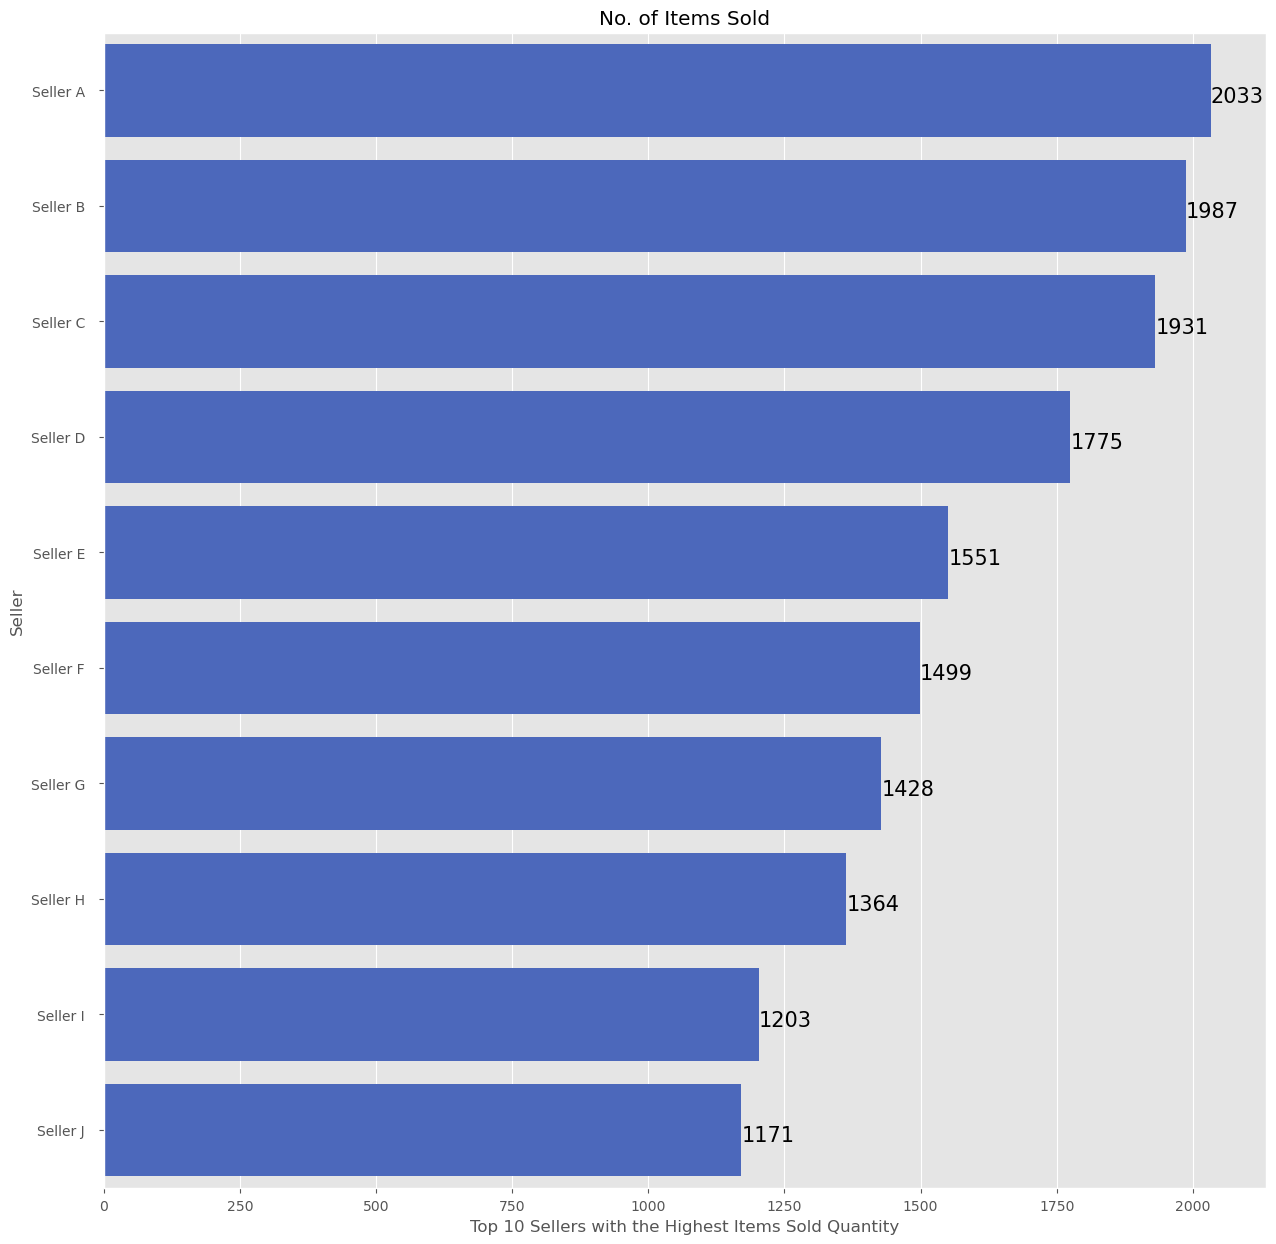

In [78]:
top_seller = order_items_df['seller_id'].value_counts().copy()
top_seller_df = top_seller.reset_index() 
top_seller_df.columns = "Seller", "No. of Ordered Items"
top_seller_df = top_seller_df.set_index("Seller")
top_seller_df.rename(index = {"6560211a19b47992c3666cc44a7e94c0": "Seller A",
                           "4a3ca9315b744ce9f8e9374361493884":"Seller B",
                           "1f50f920176fa81dab994f9023523100":"Seller C",
                           "cc419e0650a3c5ba77189a1882b7556a":"Seller D",
                           "da8622b14eb17ae2831f4ac5b9dab84a":"Seller E",
                           "955fee9216a65b617aa5c0531780ce60":"Seller F",
                           "1025f0e2d44d7041d6cf58b6550e0bfa":"Seller G",
                           "7c67e1448b00f6e969d365cea6b010ab":"Seller H",
                           "ea8482cd71df3c1969d7b9473ff13abc":"Seller I",
                           "7a67c85e85bb2ce8582c35f2203ad736":"Seller J"
                           },
                                 inplace = True)
#top_seller_df.head(10)

plt.figure(figsize=(15,15))
ax = sns.barplot(x = top_seller_df.head(10)['No. of Ordered Items'], y = top_seller_df.head(10).index, color='#3A5FCD')

ax.set_xlabel("Top 10 Sellers with the Highest Items Sold Quantity")
ax.set_title('No. of Items Sold')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round(i.get_width())),fontsize = 15, color ='black')
plt.show()

#### Seller Distribution by State
Most sellers are located in São Paulo,which is the capital city of Brazil, followed by Paraná and Minas Gerais.

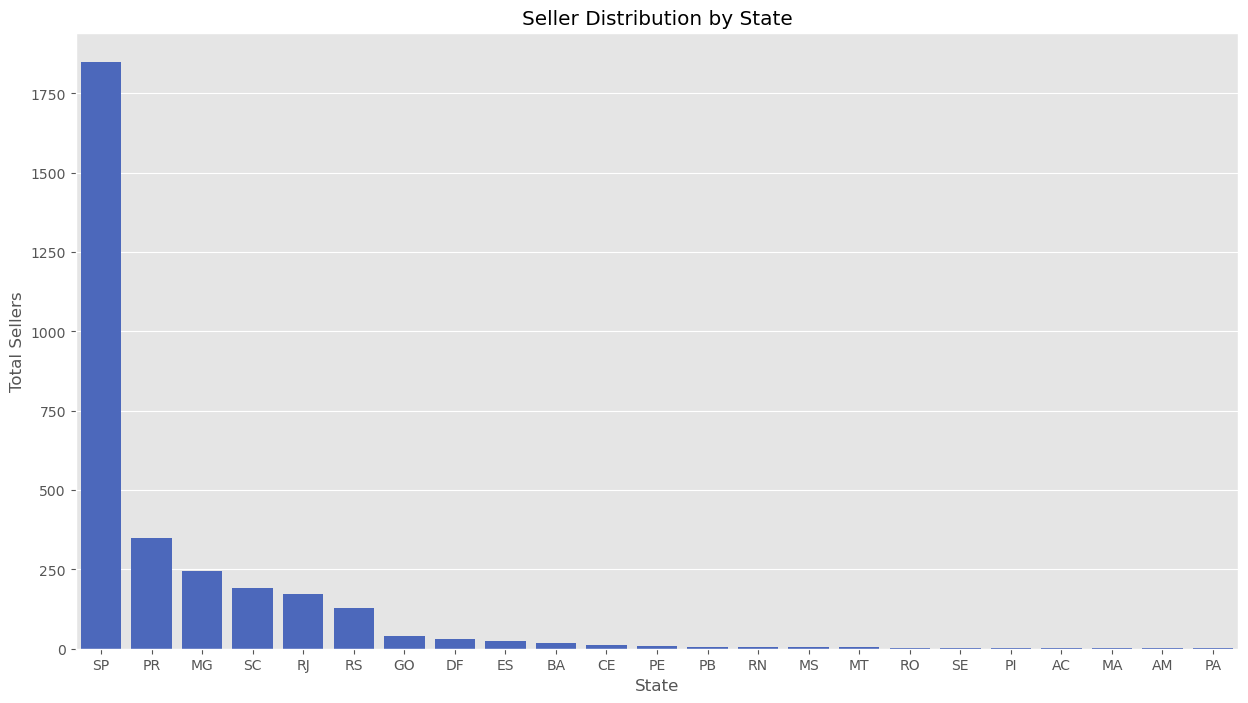

In [79]:
plt.figure(figsize=(15,8))
sns.countplot(x='seller_state', 
              data=sellers, 
              order = sellers['seller_state'].value_counts().index, color= '#3A5FCD')
plt.title('Seller Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Sellers')
plt.show()

#### Total Sales
Based on the box plot of total sales, there are many outliers as 75% of orders sales price fall below USD10,000. Top seller hits the sales of nearly USD223,000, whereas in average sellers are able to earn a sale of USD4,500.

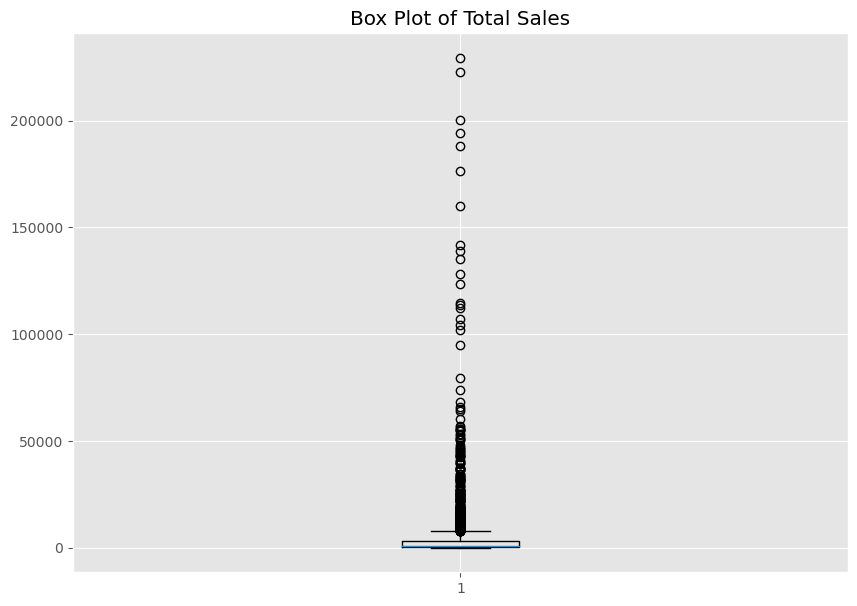

Text(0.5, 1.0, 'Histogram of Sales')

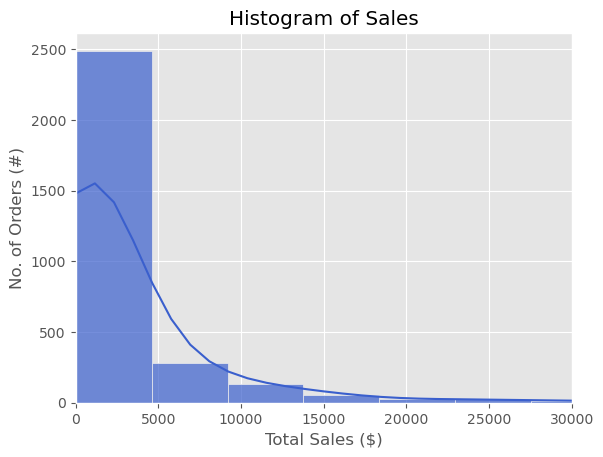

In [80]:
data1 = seller_df_final['price']
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data1)
plt.gca().set(title='Box Plot of Total Sales')
plt.show()

sns.histplot(data = seller_df_final
            ,x = 'price'
            ,color = '#3A5FCD'
            ,alpha = 0.7
            ,bins = 50
#             ,binwidth = 1
            ,kde = True
            )

plt.xlim(xmin=0, xmax=30000)
plt.xlabel('Total Sales ($)')
plt.ylabel('No. of Orders (#)')
plt.title('Histogram of Sales')


### Order Level

**Number of Products bought per Order**

Most of the customers only buy one product per order.

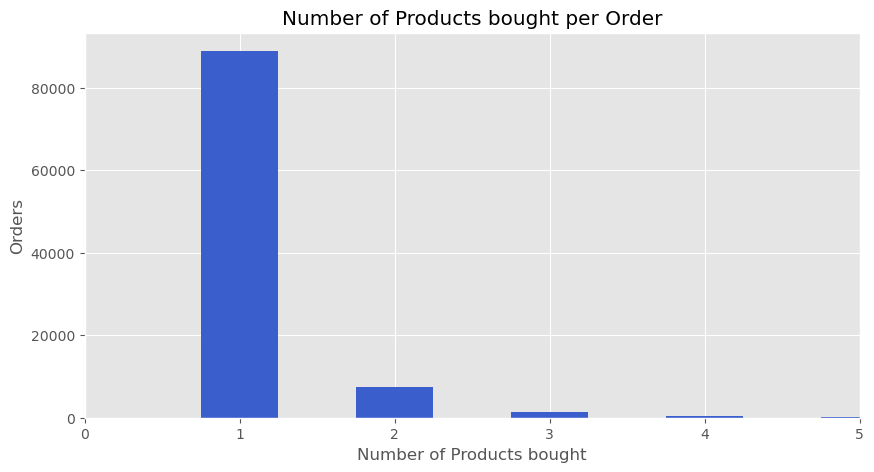

In [81]:
no_products_order_df = orders_master_df.reset_index().groupby('no_products').aggregate({'order_id': 'count'})
no_products_order_df.reset_index(inplace = True)
no_products_order_df.columns = ['products bought', 'orders']
no_products_order_df = no_products_order_df[no_products_order_df['products bought']>0]

#no_products_order_df

fig = plt.figure(figsize = (10, 5))
plt.bar(no_products_order_df['products bought'], no_products_order_df['orders'], color ='#3A5FCD', width = 0.5)
plt.xlim(xmin=0, xmax=5)
plt.xlabel("Number of Products bought")
plt.ylabel("Orders")
plt.title("Number of Products bought per Order")
plt.show()

**Item price per order**

Text(0.5, 1.0, 'Item Price per Order')

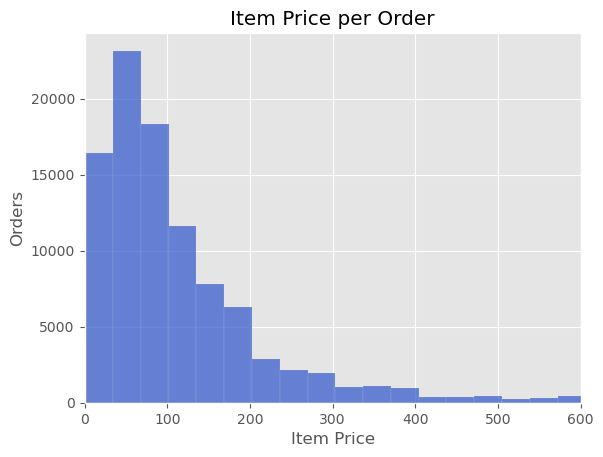

In [82]:
sns.histplot(orders_master_df
            ,x = 'total_price'
            ,color = '#3A5FCD'
            ,bins = 400
            )
plt.xlim(xmin=0, xmax = 600)
plt.xlabel('Item Price')
plt.ylabel('Orders')
plt.title('Item Price per Order')

**Freight value per order**

Mostly the freight value for each other is below USD20.

Text(0.5, 1.0, 'Freight Value Spent per Order')

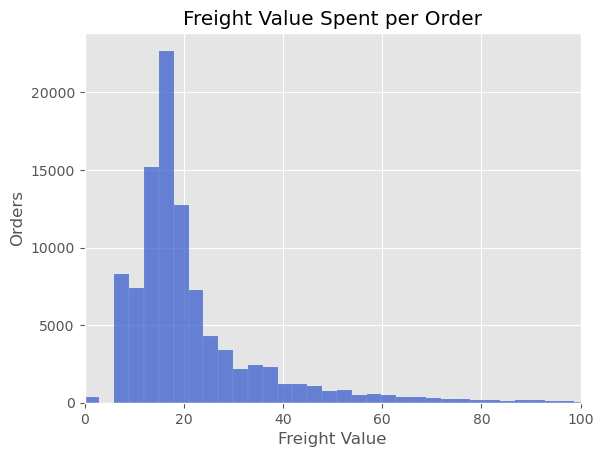

In [83]:
sns.histplot(orders_master_df
            ,x = 'total_freight_value'
            ,color = '#3A5FCD'
            ,bins = 600
            )
plt.xlim(xmin=0, xmax = 100)
plt.xlabel('Freight Value')
plt.ylabel('Orders')
plt.title('Freight Value Spent per Order')

**Number of Distinct Payment Method used per Order**

Most orders are paid using one payment method.

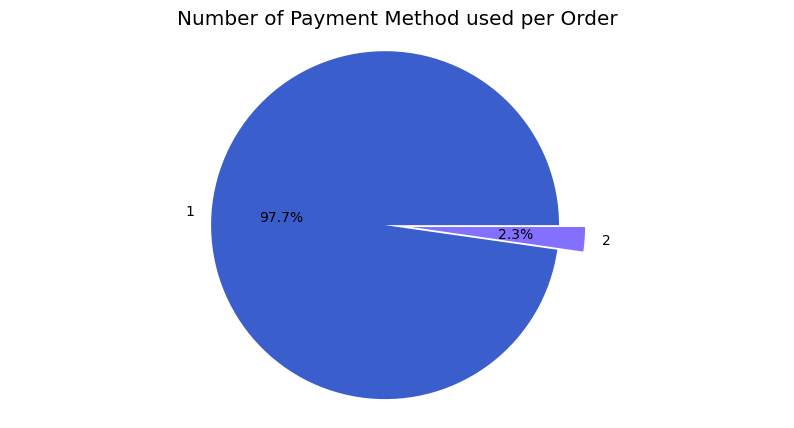

In [84]:
no_payment_type_order_df = orders_master_df.reset_index().groupby('no_payment_type').aggregate({'order_id': 'count'})
no_payment_type_order_df.reset_index(inplace = True)
no_payment_type_order_df.columns = ['No of payment method', 'orders']
no_payment_type_order_df = no_payment_type_order_df[no_payment_type_order_df['No of payment method']>0]

fig = plt.figure(figsize = (10, 5))
plt.pie(no_payment_type_order_df['orders'],
       explode=[0.1,0.05],
       autopct='%1.1f%%',
       colors = colors,
       labels = ['1','2'],
       startangle=0,
       radius=1)
plt.axis('equal')
plt.title('Number of Payment Method used per Order')
plt.show()

**Most Used Payment type**

Customers tend to use credit card to pay their orders as compared to other payment methods.

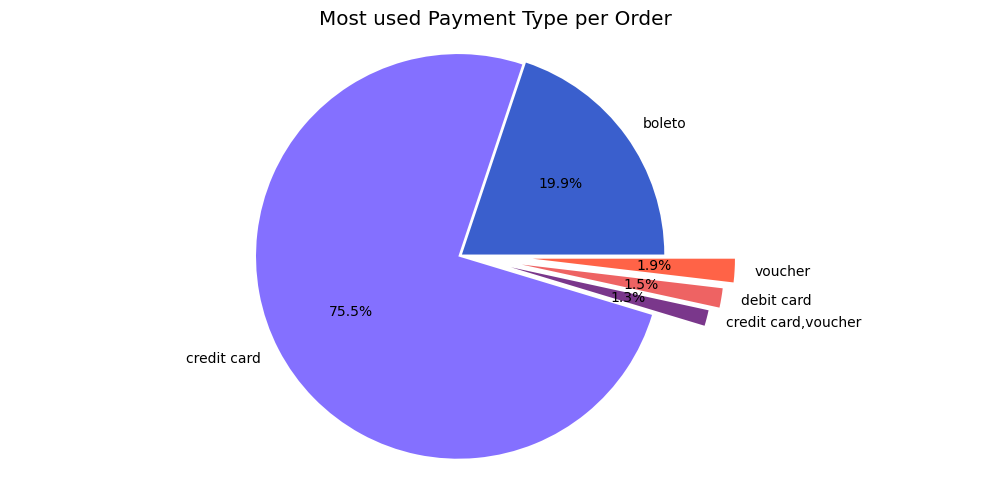

In [85]:
most_used_pt_order_df = orders_master_df.reset_index().groupby('most_used_payment_type').aggregate({'order_id': 'count'})
most_used_pt_order_df.reset_index(inplace = True)
most_used_pt_order_df.columns = ['Most used payment method', 'orders']
most_used_pt_order_df = most_used_pt_order_df[most_used_pt_order_df['Most used payment method']!=0]

fig = plt.figure(figsize = (10, 5))
plt.pie(most_used_pt_order_df['orders'],
       explode=[0,0.02,0.25,0.3,0.35],
       autopct='%1.1f%%',
       labels = most_used_pt_order_df['Most used payment method'],
       colors = colors,
       startangle=0,
       radius=1)
plt.axis('equal')
plt.title('Most used Payment Type per Order')
plt.tight_layout()
plt.show()

**Total Installments made per Order**

Customers mostly have one installment per order

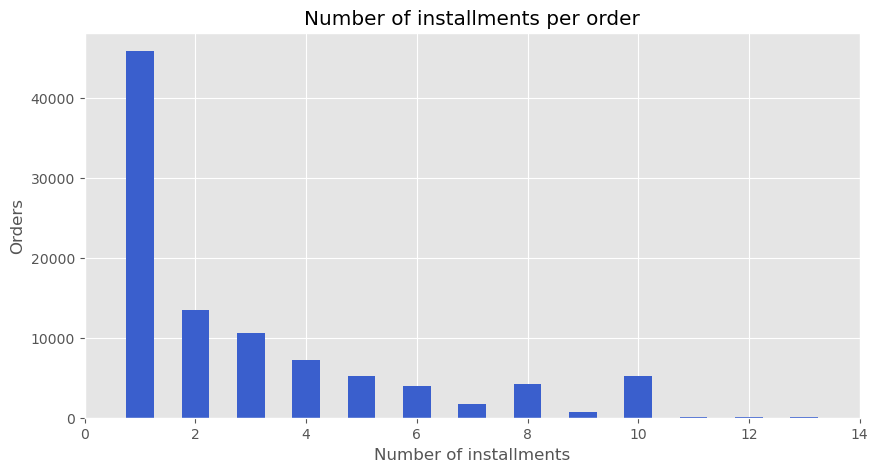

In [86]:
no_ins_order_df = orders_master_df.reset_index().groupby('total_installments').aggregate({'order_id': 'count'})
no_ins_order_df.reset_index(inplace = True)
no_ins_order_df.columns = ['Installments', 'orders']
no_ins_order_df = no_ins_order_df[no_ins_order_df['Installments']>0]

fig = plt.figure(figsize = (10, 5))
plt.bar(no_ins_order_df['Installments'], no_ins_order_df['orders'], color ='#3A5FCD', width = 0.5)
plt.xlim(xmin=0, xmax = 14)
plt.xlabel("Number of installments")
plt.ylabel("Orders")
plt.title("Number of installments per order")
plt.show()

### Customer Level

#### Customer Distribution by State
Most customers resided in São Paulo,which is the capital city of Brazil, followed by Rio de Janeiro and Minas Gerais.

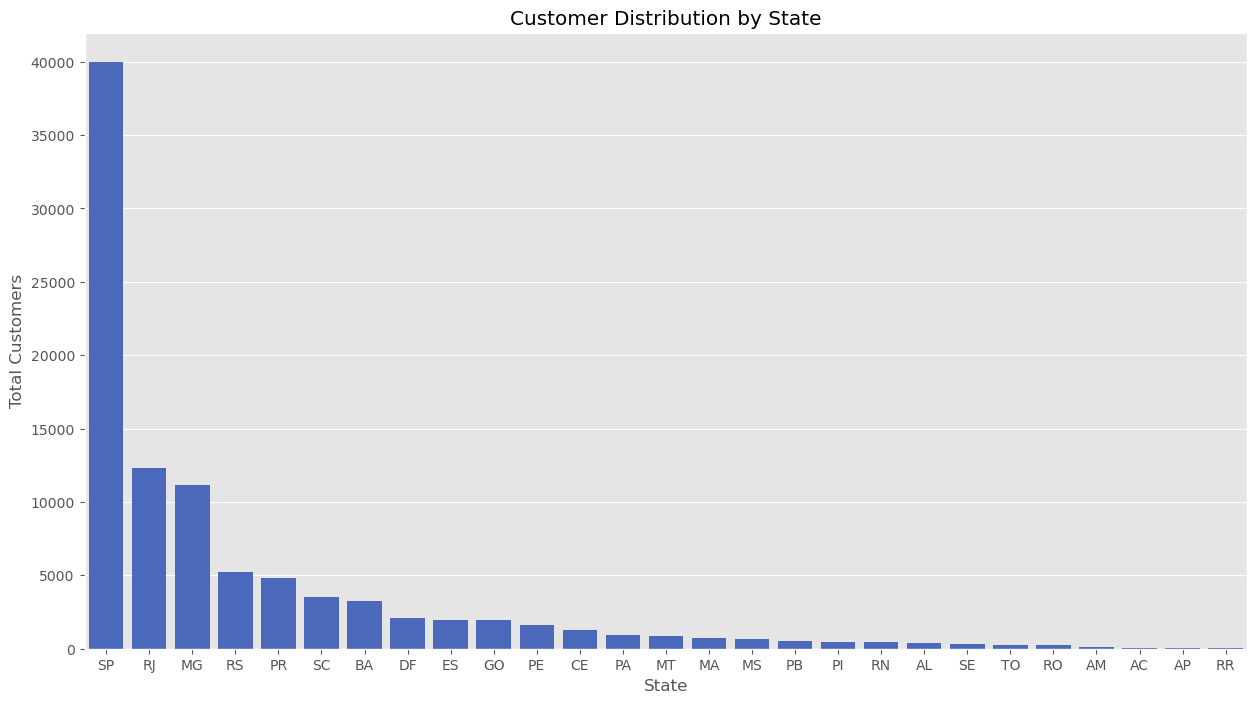

In [87]:
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', 
              data=cs_df, 
              order = cs_df['customer_state'].value_counts().index, color='#3A5FCD')
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Customers')
plt.show()

In [88]:
total_order = cs_df.reset_index().groupby('total_orders').aggregate({'customer_unique_id': 'count'})
total_order.reset_index(inplace = True)
total_order.columns = ['Total Orders', 'Frequency']
# total_order

#### Total Orders made per customer
Most customers only made one-time order.

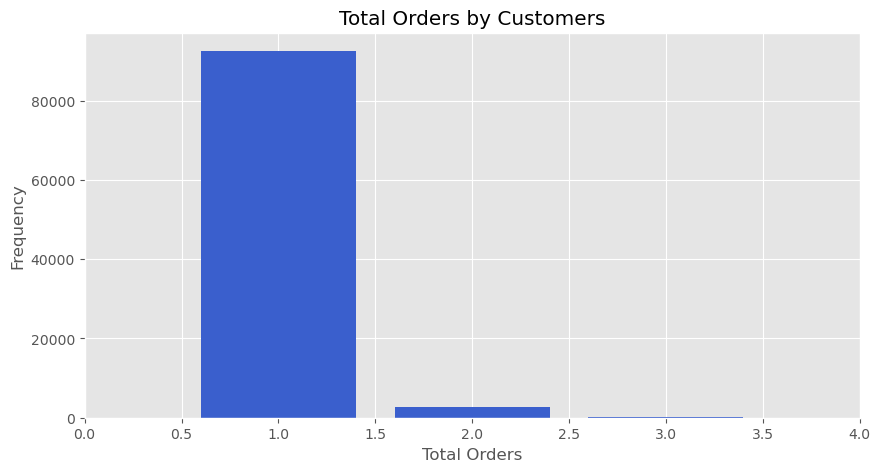

In [89]:
fig = plt.figure(figsize = (10, 5))
x = total_order['Total Orders']
y = total_order['Frequency']
plt.bar(x, y, color ='#3A5FCD', width = 0.8)
plt.xlim(xmin=0, xmax = 4)
plt.xlabel("Total Orders")
plt.ylabel("Frequency")
plt.title("Total Orders by Customers")
plt.show()

#### Total Products bought by each Customer per Order 
Most of the customers only purchase a single product in each order.

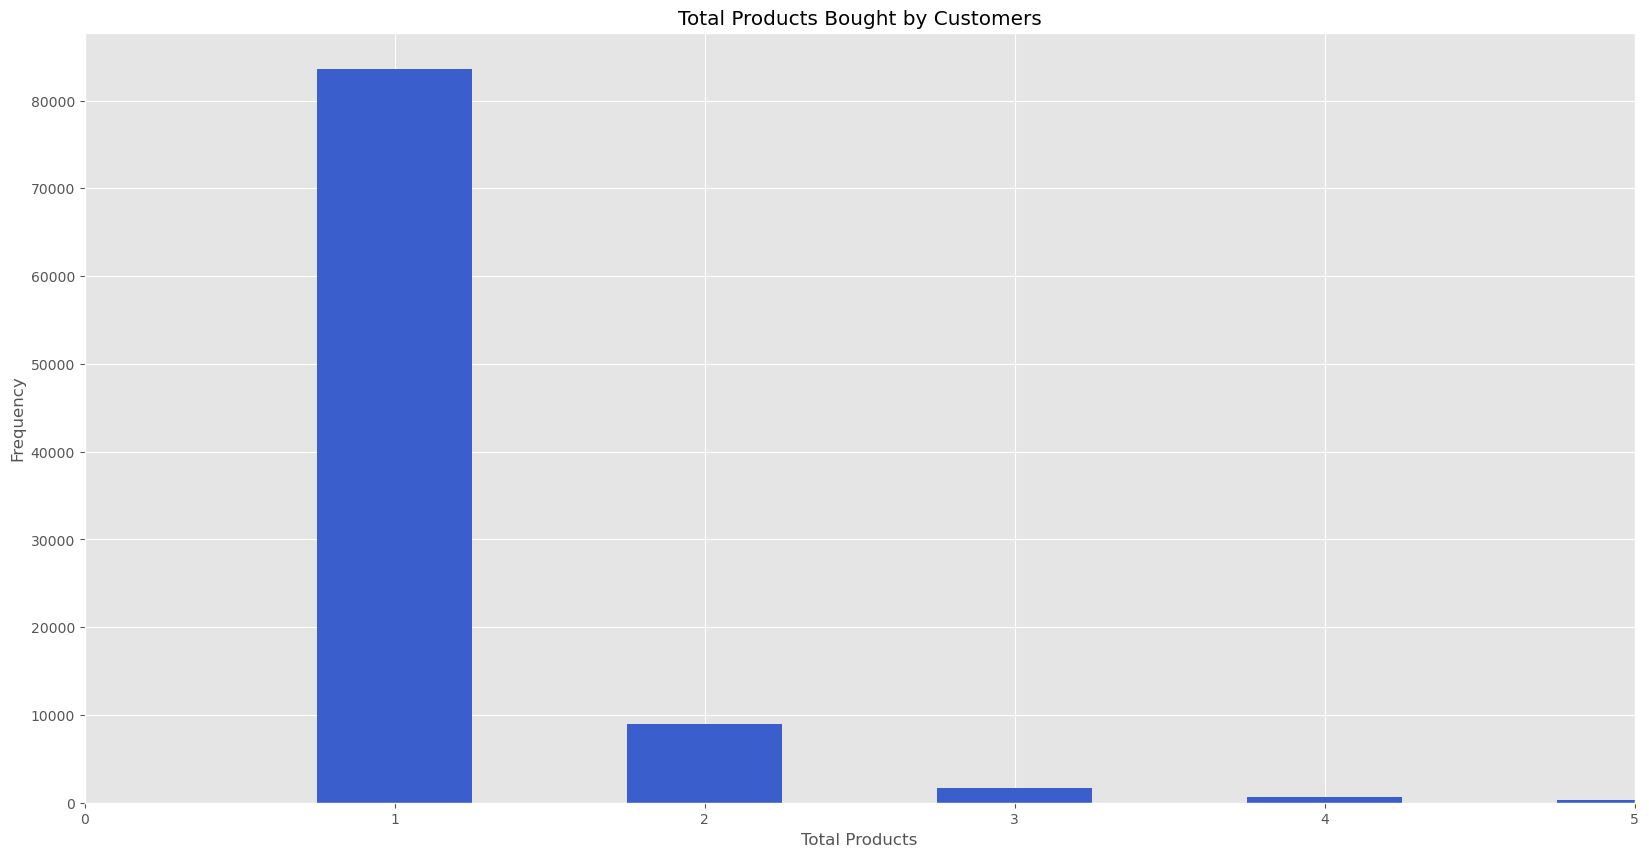

In [90]:
total_prdt = cs_df.reset_index().groupby('total_products').aggregate({'customer_unique_id': 'count'})
total_prdt.reset_index(inplace = True)
total_prdt.columns = ['Total Products', 'Frequency']
#total_prdt

fig = plt.figure(figsize = (20, 10))
x = total_prdt['Total Products']
y = total_prdt['Frequency']
plt.bar(x, y, color ='#3A5FCD', width = 0.5)
plt.xlim(xmin=0, xmax = 5)
plt.xlabel("Total Products")
plt.ylabel("Frequency")
plt.title("Total Products Bought by Customers")
plt.show()

### Total Price Spent by each Customer 
Most of the customers spent USD 0 to 400 in each order.

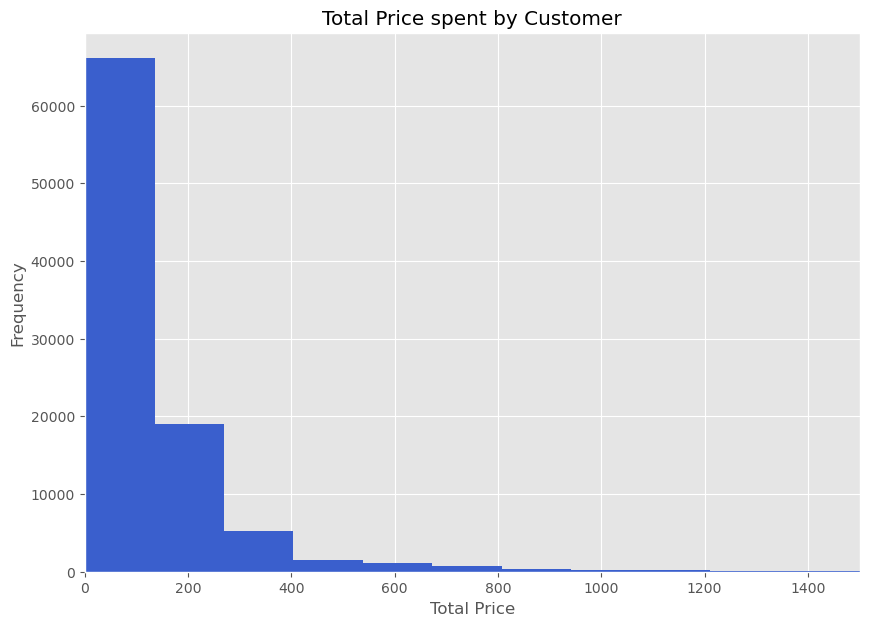

In [91]:
x = cs_df['total_price']
fig = plt.figure(figsize = (10, 7))
plt.style.use('ggplot')
plt.hist(x, bins=100, color = '#3A5FCD')
plt.gca().set(title='Total Price spent by Customer', xlabel='Total Price', ylabel='Frequency')
plt.xlim(xmin=0, xmax = 1500)
plt.show()

### Total Freight Cost Spent by each Customer 
Most of the customers spent USD 0 to 50 on delivery fee.

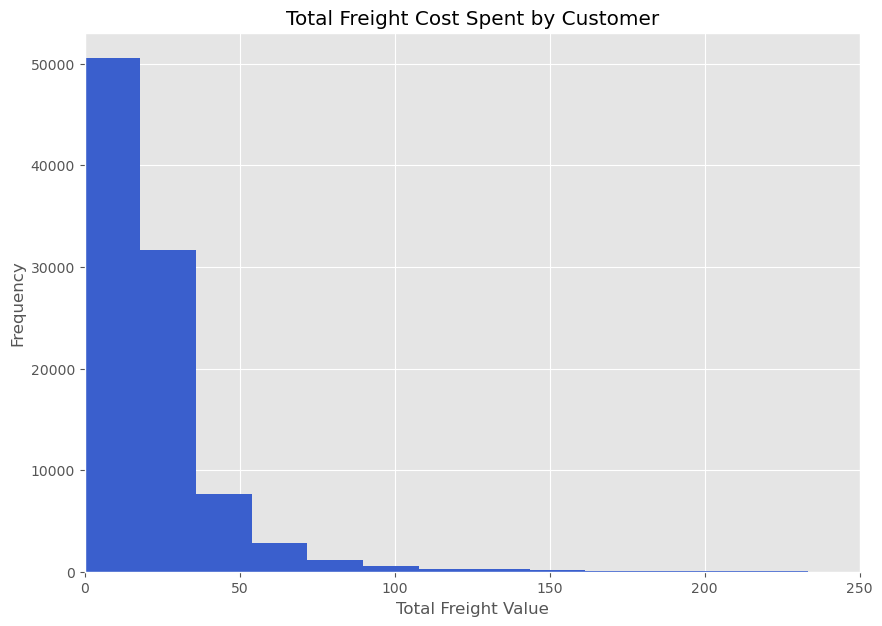

In [92]:
x = cs_df['total_freight_value']
fig = plt.figure(figsize = (10, 7))
plt.style.use('ggplot')
plt.hist(x, bins=100, color ='#3A5FCD')
plt.gca().set(title='Total Freight Cost Spent by Customer', xlabel='Total Freight Value', ylabel='Frequency')
plt.xlim(xmin=0, xmax = 250)
plt.show()

#### Number of Orders made half-yearly of 2017
From the graph, it shows that most customers only make one order in 2017. Most orders are made in the second half of the year.

<AxesSubplot:title={'center':'Total Orders Made by Customer Half Year for 2017'}, xlabel='Orders Count'>

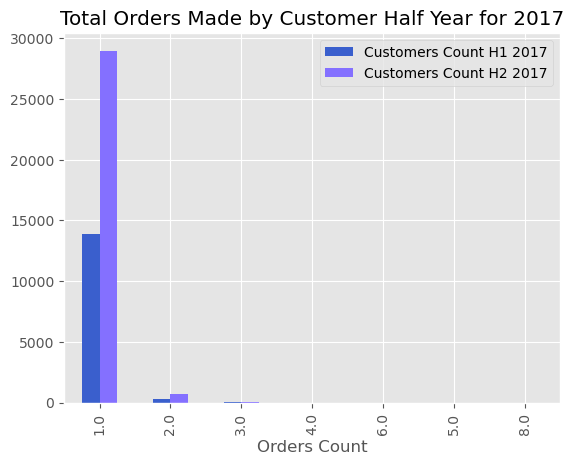

In [93]:
h1_df = order_6M_df.reset_index().groupby('2017H1').aggregate({'customer_unique_id': 'count'})
h1_df.reset_index(inplace = True)
h1_df.columns = ['Orders Count', 'Customers Count H1 2017']
#h1_df

h2_df = order_6M_df.reset_index().groupby('2017H2').aggregate({'customer_unique_id': 'count'})
h2_df.reset_index(inplace = True)
h2_df.columns = ['Orders Count', 'Customers Count H2 2017']
#h2_df

#total orders by customers half year for 2017
cs_order_half_df = pd.merge(h1_df, h2_df, how='outer', on='Orders Count')

cs_order_half_df['Customers Count H1 2017'] = cs_order_half_df['Customers Count H1 2017'].fillna(0)
cs_order_half_df['Customers Count H2 2017'] = cs_order_half_df['Customers Count H2 2017'].fillna(0)

#converting to integer
cs_order_half_df['Customers Count H1 2017'] = cs_order_half_df['Customers Count H1 2017'].astype(int)
cs_order_half_df['Customers Count H2 2017'] = cs_order_half_df['Customers Count H2 2017'].astype(int)
#cs_order_half_df
cs_order_half_df = cs_order_half_df[cs_order_half_df['Orders Count'] !=0]
cs_order_half_df.plot(x="Orders Count", y=["Customers Count H1 2017", "Customers Count H2 2017"], 
                         color=colors, kind="bar", title= "Total Orders Made by Customer Half Year for 2017")

#### Number of Orders made half-yearly of 2018
From the graph, it shows that most customers only make one order in 2018. Most orders are made in the first half of the year.

<AxesSubplot:title={'center':'Total Orders Made by Customer Half Year for 2018'}, xlabel='Orders Count'>

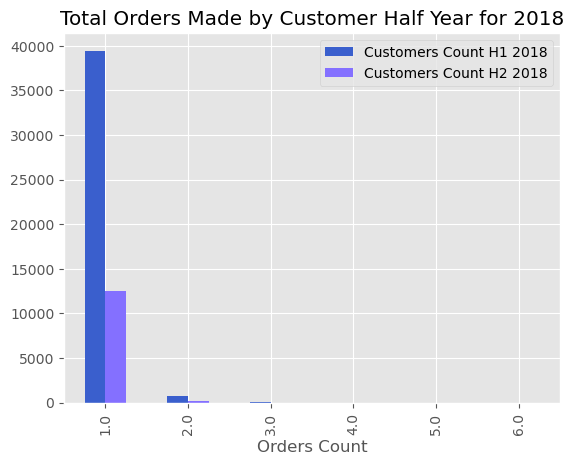

In [94]:
h1_df1 = order_6M_df.reset_index().groupby('2018H1').aggregate({'customer_unique_id': 'count'})
h1_df1.reset_index(inplace = True)
h1_df1.columns = ['Orders Count', 'Customers Count H1 2018']
#h1_df1

h2_df1 = order_6M_df.reset_index().groupby('2018H2').aggregate({'customer_unique_id': 'count'})
h2_df1.reset_index(inplace = True)
h2_df1.columns = ['Orders Count', 'Customers Count H2 2018']
#h2_df1

#total orders by customers half year for 2018
cs_order_half_df1 = pd.merge(h1_df1, h2_df1, how='outer', on='Orders Count')

cs_order_half_df1['Customers Count H1 2018'] = cs_order_half_df1['Customers Count H1 2018'].fillna(0)
cs_order_half_df1['Customers Count H2 2018'] = cs_order_half_df1['Customers Count H2 2018'].fillna(0)

#converting to integer
cs_order_half_df1['Customers Count H1 2018'] = cs_order_half_df1['Customers Count H1 2018'].astype(int)
cs_order_half_df1['Customers Count H2 2018'] = cs_order_half_df1['Customers Count H2 2018'].astype(int)
#cs_order_half_df1
cs_order_half_df1 = cs_order_half_df1[cs_order_half_df1['Orders Count'] !=0]
cs_order_half_df1.plot(x="Orders Count", y=["Customers Count H1 2018", "Customers Count H2 2018"], 
                         color=colors, kind="bar", title= "Total Orders Made by Customer Half Year for 2018")

#### Number of Orders made in each Quarter of 2017
From the graph, it shows that most customers only make one order in 2017. Most orders are made in the final quarter of the year.

<AxesSubplot:title={'center':'Total Number of Customers break down by Number of Orders made in each Quarter of 2017'}, xlabel='Orders Count'>

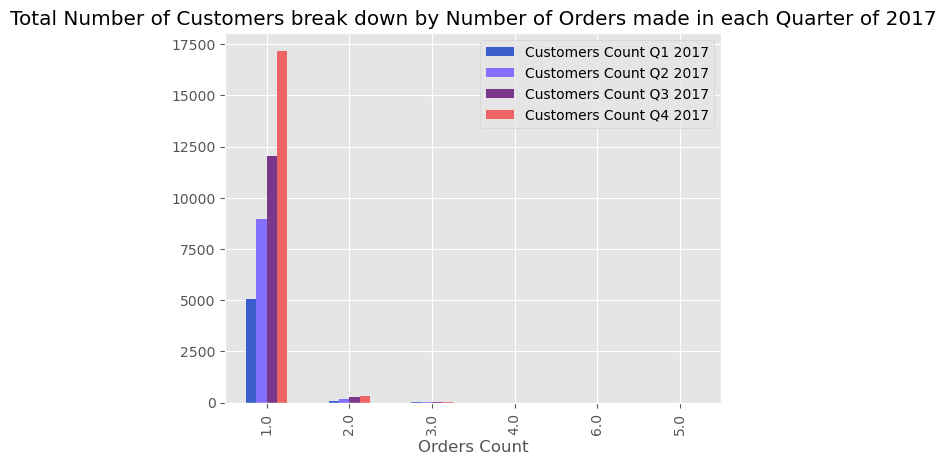

In [95]:
q1_df = order_3M_df.reset_index().groupby('2017Q1').aggregate({'customer_unique_id': 'count'})
q1_df.reset_index(inplace = True)
q1_df.columns = ['Orders Count', 'Customers Count Q1 2017']
#q1_df

q2_df = order_3M_df.reset_index().groupby('2017Q2').aggregate({'customer_unique_id': 'count'})
q2_df.reset_index(inplace = True)
q2_df.columns = ['Orders Count', 'Customers Count Q2 2017']
#q2_df

q3_df = order_3M_df.reset_index().groupby('2017Q3').aggregate({'customer_unique_id': 'count'})
q3_df.reset_index(inplace = True)
q3_df.columns = ['Orders Count', 'Customers Count Q3 2017']
#q3_df

q4_df = order_3M_df.reset_index().groupby('2017Q4').aggregate({'customer_unique_id': 'count'})
q4_df.reset_index(inplace = True)
q4_df.columns = ['Orders Count', 'Customers Count Q4 2017']
#q4_df

#total orders by customers quarterly for 2017
cs_order_quarter_df = pd.merge(q1_df, q2_df, how='outer', on='Orders Count')
cs_order_quarter_df = pd.merge(cs_order_quarter_df, q3_df, how='outer', on='Orders Count')
cs_order_quarter_df = pd.merge(cs_order_quarter_df, q4_df, how='outer', on='Orders Count')

cs_order_quarter_df['Customers Count Q1 2017'] = cs_order_quarter_df['Customers Count Q1 2017'].fillna(0)
cs_order_quarter_df['Customers Count Q2 2017'] = cs_order_quarter_df['Customers Count Q2 2017'].fillna(0)
cs_order_quarter_df['Customers Count Q3 2017'] = cs_order_quarter_df['Customers Count Q3 2017'].fillna(0)
cs_order_quarter_df['Customers Count Q4 2017'] = cs_order_quarter_df['Customers Count Q4 2017'].fillna(0)

#converting to integer
cs_order_quarter_df['Customers Count Q1 2017'] = cs_order_quarter_df['Customers Count Q1 2017'].astype(int)
cs_order_quarter_df['Customers Count Q2 2017'] = cs_order_quarter_df['Customers Count Q2 2017'].astype(int)
cs_order_quarter_df['Customers Count Q3 2017'] = cs_order_quarter_df['Customers Count Q3 2017'].astype(int)
cs_order_quarter_df['Customers Count Q4 2017'] = cs_order_quarter_df['Customers Count Q4 2017'].astype(int)
cs_order_quarter_df = cs_order_quarter_df[cs_order_quarter_df['Orders Count'] !=0]
#cs_order_quarter_df

cs_order_quarter_df.plot(x="Orders Count", y=["Customers Count Q1 2017", "Customers Count Q2 2017", 
                                              "Customers Count Q3 2017", "Customers Count Q4 2017"], 
                         color=colors, kind="bar", title= "Total Number of Customers break down by Number of Orders made in each Quarter of 2017")

#### Number of Orders made in each Quarter of 2018
Similarly, it shows that most customers only make one order in 2018. However, most orders are made in the first quarter of the year. No orders are made in the final quarter of 2018 as the dataset period is up to September 2018 only.

<AxesSubplot:title={'center':'Total Orders Made by Customer Quarterly for 2018'}, xlabel='Orders Count'>

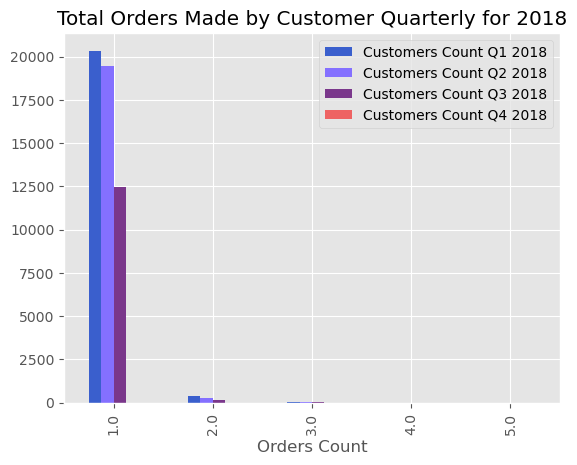

In [96]:
q1_df1 = order_3M_df.reset_index().groupby('2018Q1').aggregate({'customer_unique_id': 'count'})
q1_df1.reset_index(inplace = True)
q1_df1.columns = ['Orders Count', 'Customers Count Q1 2018']
#q1_df1

q2_df1 = order_3M_df.reset_index().groupby('2018Q2').aggregate({'customer_unique_id': 'count'})
q2_df1.reset_index(inplace = True)
q2_df1.columns = ['Orders Count', 'Customers Count Q2 2018']
#q2_df1

q3_df1 = order_3M_df.reset_index().groupby('2018Q3').aggregate({'customer_unique_id': 'count'})
q3_df1.reset_index(inplace = True)
q3_df1.columns = ['Orders Count', 'Customers Count Q3 2018']
#q3_df1

q4_df1 = order_3M_df.reset_index().groupby('2018Q4').aggregate({'customer_unique_id': 'count'})
q4_df1.reset_index(inplace = True)
q4_df1.columns = ['Orders Count', 'Customers Count Q4 2018']
#q4_df1

#total orders by customers quarterly for 2018
cs_order_quarter_df1 = pd.merge(q1_df1, q2_df1, how='outer', on='Orders Count')
cs_order_quarter_df1 = pd.merge(cs_order_quarter_df1, q3_df1, how='outer', on='Orders Count')
cs_order_quarter_df1 = pd.merge(cs_order_quarter_df1, q4_df1, how='outer', on='Orders Count')

cs_order_quarter_df1['Customers Count Q1 2018'] = cs_order_quarter_df1['Customers Count Q1 2018'].fillna(0)
cs_order_quarter_df1['Customers Count Q2 2018'] = cs_order_quarter_df1['Customers Count Q2 2018'].fillna(0)
cs_order_quarter_df1['Customers Count Q3 2018'] = cs_order_quarter_df1['Customers Count Q3 2018'].fillna(0)
cs_order_quarter_df1['Customers Count Q4 2018'] = cs_order_quarter_df1['Customers Count Q4 2018'].fillna(0)

#converting to integer
cs_order_quarter_df1['Customers Count Q1 2018'] = cs_order_quarter_df1['Customers Count Q1 2018'].astype(int)
cs_order_quarter_df1['Customers Count Q2 2018'] = cs_order_quarter_df1['Customers Count Q2 2018'].astype(int)
cs_order_quarter_df1['Customers Count Q3 2018'] = cs_order_quarter_df1['Customers Count Q3 2018'].astype(int)
cs_order_quarter_df1['Customers Count Q4 2018'] = cs_order_quarter_df1['Customers Count Q4 2018'].astype(int)
cs_order_quarter_df1 = cs_order_quarter_df1[cs_order_quarter_df1['Orders Count'] !=0]
#cs_order_quarter_df1

cs_order_quarter_df1.plot(x="Orders Count", y=["Customers Count Q1 2018", "Customers Count Q2 2018", 
                                              "Customers Count Q3 2018", "Customers Count Q4 2018"], 
                         color=colors, kind="bar", title= "Total Orders Made by Customer Quarterly for 2018")

In [97]:
# x = cs_df['avg_orders_3M_2017']
# fig = plt.figure(figsize = (10, 7))
# plt.style.use('ggplot')
# plt.hist(x, bins=10, color ='#3A5FCD')
# plt.gca().set(title='Histogram of Average Orders 3 Months-2017', xlabel='Average Orders 3M-2017', ylabel='Frequency')
# plt.xlim(xmin=0, xmax = 1.5)
# plt.show()

In [98]:
# x = cs_df['avg_orders_3M_2018']
# fig = plt.figure(figsize = (10, 7))
# plt.style.use('ggplot')
# plt.hist(x, bins=10, color ='#3A5FCD')
# plt.gca().set(title='Histogram of Average Orders 3 Months-2018', xlabel='Average Orders 3M-2018', ylabel='Frequency')
# plt.xlim(xmin=0, xmax = 1.00)
# plt.show()

In [99]:
# x = cs_df['avg_orders_6M_2017']
# fig = plt.figure(figsize = (10, 7))
# plt.style.use('ggplot')
# plt.hist(x, bins=10, color ='#3A5FCD')
# plt.gca().set(title='Histogram of Average Orders 6 Months-2017', xlabel='Average Orders 6M-2017', ylabel='Frequency')
# plt.show()

In [100]:
# x = cs_df['avg_orders_6M_2018']
# fig = plt.figure(figsize = (10, 7))
# plt.style.use('ggplot')
# plt.hist(x, bins=10, color ='#3A5FCD')
# plt.gca().set(title='Histogram of Average Orders 6 Months-2018', xlabel='Average Orders 6M-2018', ylabel='Frequency')
# plt.show()

In [101]:
morning_df = cs_df.reset_index().groupby('total_orders_morning').aggregate({'customer_unique_id': 'count'})
morning_df.reset_index(inplace = True)
morning_df.columns = ['Orders Count', 'Customers Count Morning Order']
#morning_df

afternoon_df = cs_df.reset_index().groupby('total_orders_afternoon').aggregate({'customer_unique_id': 'count'})
afternoon_df.reset_index(inplace = True)
afternoon_df.columns = ['Orders Count', 'Customers Count Afternoon Order']
#afternoon_df

evening_df = cs_df.reset_index().groupby('total_orders_evening').aggregate({'customer_unique_id': 'count'})
evening_df.reset_index(inplace = True)
evening_df.columns = ['Orders Count', 'Customers Count Evening Order']
#evening_df

night_df = cs_df.reset_index().groupby('total_orders_night').aggregate({'customer_unique_id': 'count'})
night_df.reset_index(inplace = True)
night_df.columns = ['Orders Count', 'Customers Count Night Order']
#night_df

# total_unique_products and total_sellers_dealt at customer level
cs_order_session_df = pd.merge(morning_df, afternoon_df, how='left', on='Orders Count')
cs_order_session_df = pd.merge(cs_order_session_df, evening_df, how='left', on='Orders Count')
cs_order_session_df = pd.merge(cs_order_session_df, night_df, how='left', on='Orders Count')

cs_order_session_df['Customers Count Afternoon Order'] = cs_order_session_df['Customers Count Afternoon Order'].fillna(0)
cs_order_session_df['Customers Count Evening Order'] = cs_order_session_df['Customers Count Evening Order'].fillna(0)
cs_order_session_df['Customers Count Night Order'] = cs_order_session_df['Customers Count Night Order'].fillna(0)

#convert columns to integer
cs_order_session_df['Customers Count Afternoon Order'] = cs_order_session_df['Customers Count Afternoon Order'].astype(int)
cs_order_session_df['Customers Count Evening Order'] = cs_order_session_df['Customers Count Evening Order'].astype(int)
cs_order_session_df['Customers Count Night Order'] = cs_order_session_df['Customers Count Night Order'].astype(int)
cs_order_session_df = cs_order_session_df[cs_order_session_df['Orders Count'] !=0]
#cs_order_session_df

#### Number of Orders in Different Time Session Throughout the Day
Based on our dataset, most of the customers only purchase once and to focus in the time session, most orders are made in the afternoon, followed by evening session, morning and lastly at night.

<AxesSubplot:title={'center':'Total Orders Made Throughout the Day'}, xlabel='Orders Count'>

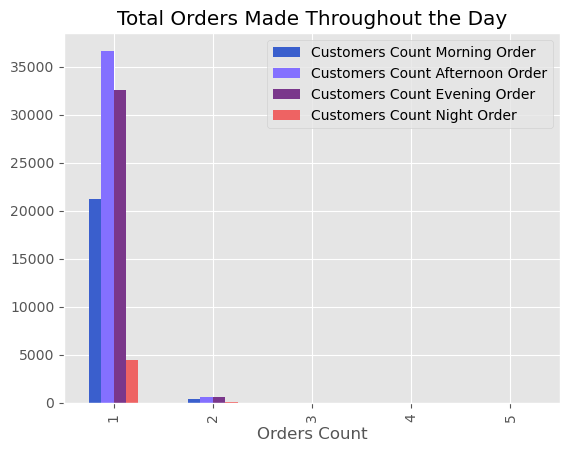

In [102]:
cs_order_session_df.plot(x="Orders Count", y=["Customers Count Morning Order", "Customers Count Afternoon Order", 
                                              "Customers Count Evening Order", "Customers Count Night Order"], 
                         color=colors, kind="bar", title= "Total Orders Made Throughout the Day")

In [103]:
# cs_order_session_df2 = cs_order_session_df[cs_order_session_df['Orders Count'] ==1]
# #cs_order_session_df2

# cs_order_session_df2.plot(x="Orders Count", y=["Customers Count Morning Order", "Customers Count Afternoon Order", 
#                                               "Customers Count Evening Order", "Customers Count Night Order"], 
#                          color=colors, kind="bar")


#### Number of Payment Method used by Customer 
Almost all customers chose to pay for their bills with only one payment method. They are already comfortable with the available payment method used.

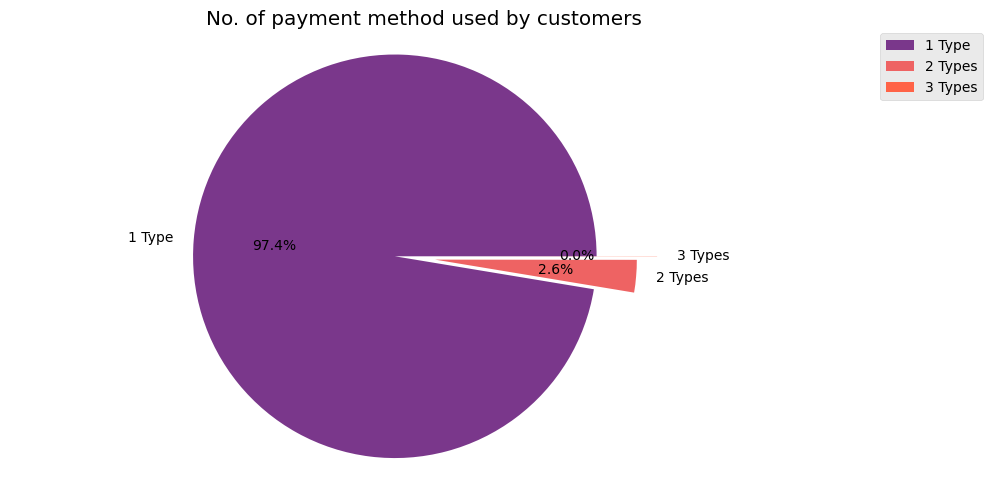

In [104]:
cs_pymt_df = cs_df.reset_index().groupby('no_payment_type').aggregate({'customer_unique_id': 'count'})
cs_pymt_df.reset_index(inplace = True)
cs_pymt_df.columns = ['No. of payment method used', 'No. of customers']
cs_pymt_df = cs_pymt_df[cs_pymt_df['No. of payment method used']!=0]
cs_pymt_df = cs_pymt_df.set_index("No. of payment method used")
cs_pymt_df.rename(index = {1.0: "1 Type",
                           2.0:"2 Types",
                           3.0:"3 Types"},
                                 inplace = True)
cs_pymt_df.reset_index(inplace = True)
#cs_pymt_df

fig = plt.figure(figsize = (10, 5))
plt.pie(cs_pymt_df['No. of customers'],
       explode = [0,0.2,0.3],
       autopct='%1.1f%%',
       labels = cs_pymt_df['No. of payment method used'],
       colors=colors[2:5],
       startangle=0,
       radius=1)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('No. of payment method used by customers')
plt.tight_layout()
plt.show()

#### Number of Reviews by Customer 
Most customers provide a one-time review and most of the reviews fall under the highest rating score. In terms of review length, most reviews fall between the word count of 0 and 25.

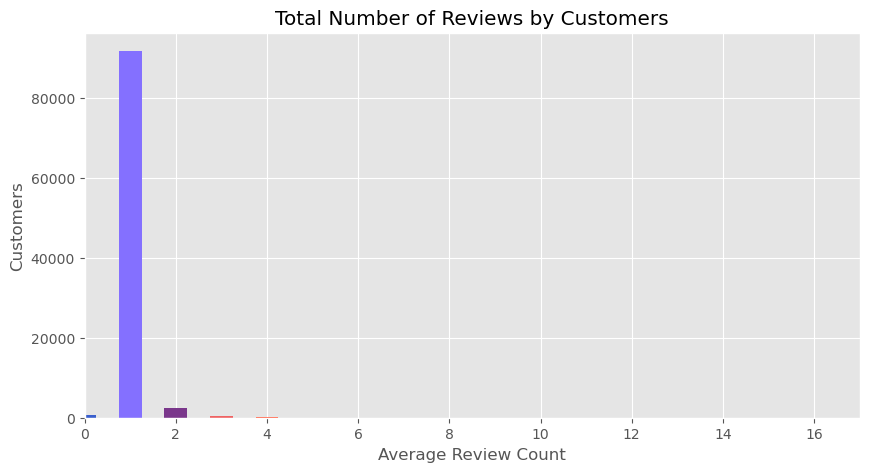

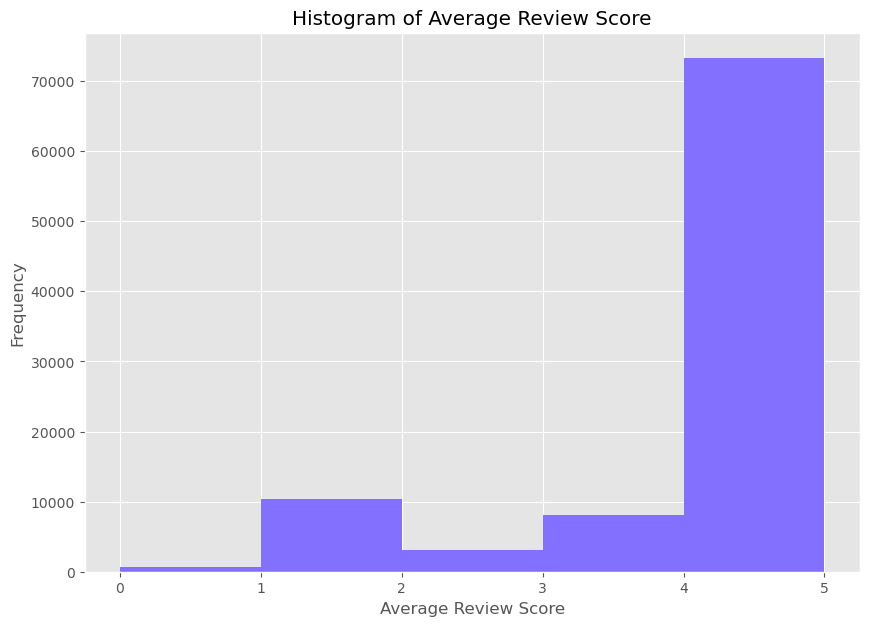

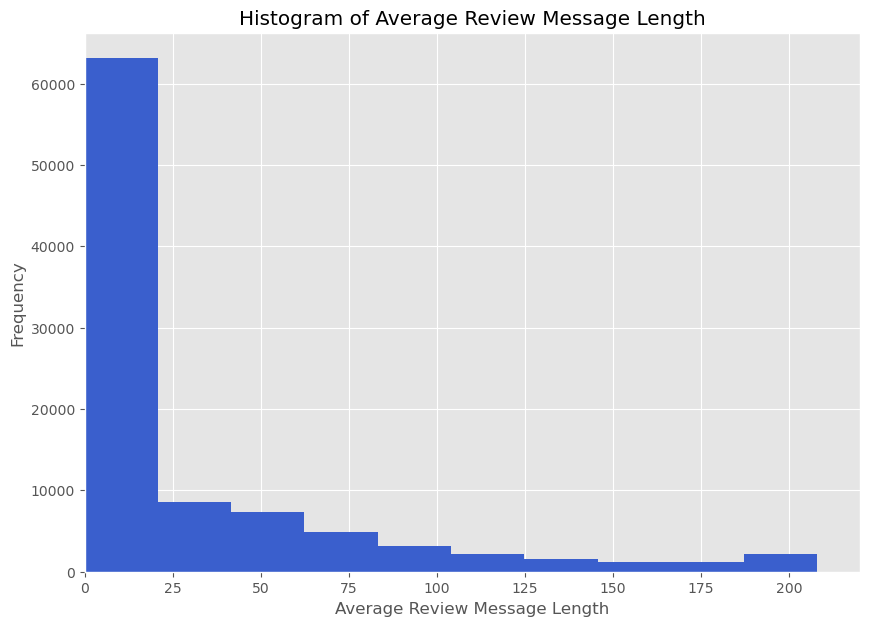

In [105]:
review_score = cs_df.reset_index().groupby('total_review_count').aggregate({'customer_unique_id': 'count'})
review_score.reset_index(inplace = True)
review_score.columns = ['Total Review Count', 'Customers']
#review_score

fig = plt.figure(figsize = (10, 5))
x = review_score['Total Review Count']
y = review_score['Customers']
plt.bar(x, y, color = colors, width = 0.5)
plt.xlim(xmin=0, xmax = 17)
plt.xlabel("Average Review Count")
plt.ylabel("Customers")
plt.title("Total Number of Reviews by Customers")
plt.show()

x = cs_df['avg_review_score']
fig = plt.figure(figsize = (10, 7))
plt.style.use('ggplot')
plt.hist(x, bins=5, color = colors[1])
plt.gca().set(title='Histogram of Average Review Score', xlabel='Average Review Score', ylabel='Frequency')
plt.show()

x = cs_df['avg_review_msg_length']
fig = plt.figure(figsize = (10, 7))
plt.style.use('ggplot')
plt.hist(x, bins=10, color ='#3A5FCD')
plt.xlim(xmin=0, xmax = 220)
plt.gca().set(title='Histogram of Average Review Message Length', xlabel='Average Review Message Length', ylabel='Frequency')
plt.show()

## 4 Machine Learning Modelling

In [2]:
import pandas as pd
import numpy as np

# Read CSV
cust_df = pd.read_csv("Customer Master Table.csv")

# display(cust_df.head())

# add a column for customer index
cust_df = cust_df.reset_index()

# display(cust_df.head())

# rename index column
cust_df.rename(columns={'index':'customer_index'}, inplace=True)

# customer unique id reference table
cust_id_tbl = cust_df[['customer_index', 'customer_unique_id']]

# replace true/false with 1/0
cust_df['payment_boleto'] = cust_df['payment_boleto'].astype(int)
cust_df['payment_credit_card'] = cust_df['payment_credit_card'].astype(int)
cust_df['payment_debit_card'] = cust_df['payment_debit_card'].astype(int)
cust_df['payment_not_defined'] = cust_df['payment_not_defined'].astype(int)
cust_df['payment_voucher'] = cust_df['payment_voucher'].astype(int)

# transform most used payment type
cust_df['most_used_pt_bl'] = np.where(cust_df['most_used_payment_type'].str.contains('boleto'), 1, 0)
cust_df['most_used_pt_cc'] = np.where(cust_df['most_used_payment_type'].str.contains('credit card'), 1, 0)
cust_df['most_used_pt_dc'] = np.where(cust_df['most_used_payment_type'].str.contains('debit card'), 1, 0)
cust_df['most_used_pt_nd'] = np.where(cust_df['most_used_payment_type'].str.contains('not defined'), 1, 0)
cust_df['most_used_pt_vc'] = np.where(cust_df['most_used_payment_type'].str.contains('voucher'), 1, 0)

# transform most paid payment type
cust_df['most_paid_pt_bl'] = np.where(cust_df['most_paid_payment_type'].str.contains('boleto'), 1, 0)
cust_df['most_paid_pt_cc'] = np.where(cust_df['most_paid_payment_type'].str.contains('credit card'), 1, 0)
cust_df['most_paid_pt_dc'] = np.where(cust_df['most_paid_payment_type'].str.contains('debit card'), 1, 0)
cust_df['most_paid_pt_nd'] = np.where(cust_df['most_paid_payment_type'].str.contains('not defined'), 1, 0)
cust_df['most_paid_pt_vc'] = np.where(cust_df['most_paid_payment_type'].str.contains('voucher'), 1, 0)

# drop some columns
cols_to_drop = ['customer_unique_id', 'most_used_payment_type', 'most_paid_payment_type', 'customer_city', 
                'customer_state', 'full_state', 'geolocation_city']
cust_df.drop(cols_to_drop, axis=1, inplace=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

display(cust_df.head())

,customer_index,total_orders,total_products,avg_product_per_order,avg_unique_product_per_order,avg_sellers_dealt_per_order,total_price,avg_price_per_order,total_freight_value,avg_freight_value_per_order,avg_installment_per_order,avg_payment_installments_boleto,avg_payment_installments_credit_card,avg_payment_installments_debit_card,avg_payment_installments_not_defined,avg_payment_installments_voucher,avg_payment_value_boleto,avg_payment_value_credit_card,avg_payment_value_debit_card,avg_payment_value_not_defined,avg_payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,no_payment_type,total_unique_products,total_sellers_dealt,customer_zip_code_prefix,geolocation_lat,geolocation_lng,total_orders_2016,total_orders_2017,total_orders_2018,avg_orders_per_month_2017,avg_orders_per_month_2018,avg_orders_3M_2017,avg_orders_3M_2018,avg_orders_6M_2017,avg_orders_6M_2018,total_orders_night,total_orders_morning,total_orders_afternoon,total_orders_evening,total_review_count,avg_review_score,avg_review_msg_length,most_used_pt_bl,most_used_pt_cc,most_used_pt_dc,most_used_pt_nd,most_used_pt_vc,most_paid_pt_bl,most_paid_pt_cc,most_paid_pt_dc,most_paid_pt_nd,most_paid_pt_vc
0,0,1,1,1,1,1,129.90,129.90,12.00,12.00,8,0,8,0,0,0,0.0,141.90,0.0,0.0,0.0,0,1,0,0,0,1,1,1,7787,-23.335331,-46.828647,0,0,1,0.000000,0.083333,0.00,0.25,0.0,0.5,0,1,0,0,1,5.0,111.0,0,1,0,0,0,0,1,0,0,0
1,1,1,1,1,1,1,18.90,18.90,8.29,8.29,1,0,1,0,0,0,0.0,27.19,0.0,0.0,0.0,0,1,0,0,0,1,1,1,6053,-23.567395,-46.792957,0,0,1,0.000000,0.083333,0.00,0.25,0.0,0.5,0,1,0,0,1,4.0,0.0,0,1,0,0,0,0,1,0,0,0
2,2,1,1,1,1,1,69.00,69.00,17.22,17.22,8,0,8,0,0,0,0.0,86.22,0.0,0.0,0.0,0,1,0,0,0,1,1,1,88115,-27.543787,-48.625680,0,1,0,0.083333,0.000000,0.25,0.00,0.5,0.0,0,0,0,1,1,3.0,0.0,0,1,0,0,0,0,1,0,0,0
3,3,1,1,1,1,1,25.99,25.99,17.63,17.63,4,0,4,0,0,0,0.0,43.62,0.0,0.0,0.0,0,1,0,0,0,1,1,1,66812,-1.311011,-48.482884,0,1,0,0.083333,0.000000,0.25,0.00,0.5,0.0,0,0,0,1,1,4.0,12.0,0,1,0,0,0,0,1,0,0,0
4,4,1,1,1,1,1,180.00,180.00,16.89,16.89,6,0,6,0,0,0,0.0,196.89,0.0,0.0,0.0,0,1,0,0,0,1,1,1,18040,-23.504368,-47.466156,0,1,0,0.083333,0.000000,0.25,0.00,0.5,0.0,0,0,0,1,1,5.0,0.0,0,1,0,0,0,0,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95419 entries, 0 to 95418
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_index                        95419 non-null  int64  
 1   total_orders                          95419 non-null  int64  
 2   total_products                        95419 non-null  int64  
 3   avg_product_per_order                 95419 non-null  int64  
 4   avg_unique_product_per_order          95419 non-null  int64  
 5   avg_sellers_dealt_per_order           95419 non-null  int64  
 6   total_price                           95419 non-null  float64
 7   avg_price_per_order                   95419 non-null  float64
 8   total_freight_value                   95419 non-null  float64
 9   avg_freight_value_per_order           95419 non-null  float64
 10  avg_installment_per_order             95419 non-null  int64  
 11  avg_payment_ins

### Dimensionality Reduction using PCA

In [134]:
from sklearn.preprocessing import StandardScaler

# normalize data
sc = StandardScaler()
X_SC = cust_df.copy()
for cols in X_SC.columns:
    X_SC[cols] = sc.fit_transform(X_SC[cols].values.reshape(-1,1))
    
from sklearn.decomposition import PCA

# Implement PCA algorithm
pca = PCA(n_components=15, whiten=True)
pca.fit(X_SC)
explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_


**Decide how many components to use in our model to balance the trade-off between computing resources and model performance.**
\
&nbsp;

There are a few methods to choose the optimal number of principal components:
1. Examine the knee in the explained variance plot
2. Keep components that account for more than 1% of the variance in the dataset
3. Preserve around 80% of explained variance in the model

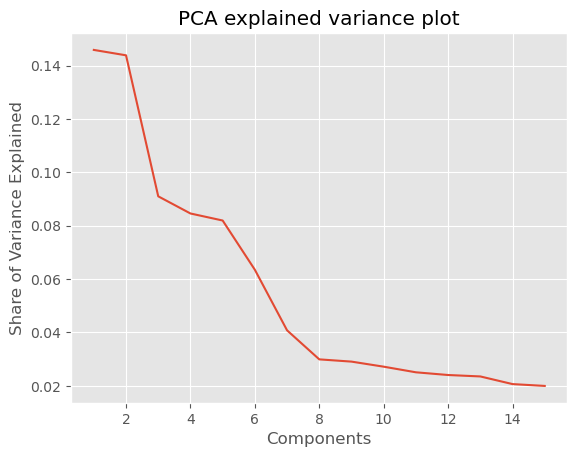

In [123]:
import matplotlib.pyplot as plt

# PCA explained variance plot by components
x = np.arange(1,len(explained_variance)+1)
plt.plot(x, explained_variance)
plt.ylabel('Share of Variance Explained')
plt.title("PCA explained variance plot")
plt.xlabel("Components")
plt.show()

Text(0.5, 0, 'Components')

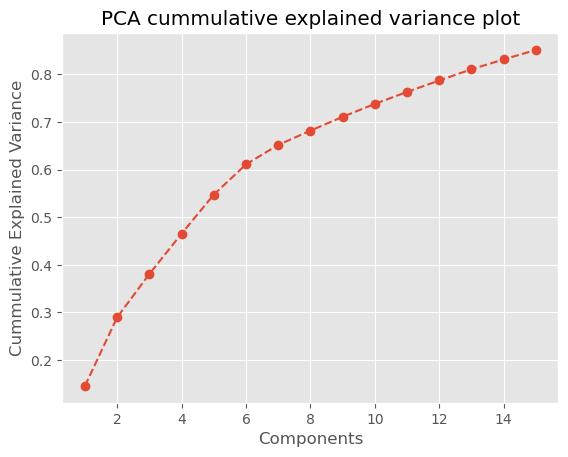

In [109]:
import matplotlib.pyplot as plt

# PCA cummulative explained variance plot by components
x = np.arange(1,len(explained_variance)+1)
plt.plot(x, explained_variance.cumsum(), marker = 'o', linestyle = '--')
plt.ylabel('Cummulative Explained Variance')
plt.title("PCA cummulative explained variance plot")
plt.xlabel("Components")

In [110]:
# iterate over the components to print the explained variance
for i in range(0, 15):
    print(f"Component {i:>2} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component  0 accounts for 14.59% of variance
Component  1 accounts for 14.39% of variance
Component  2 accounts for 9.10% of variance
Component  3 accounts for 8.46% of variance
Component  4 accounts for 8.19% of variance
Component  5 accounts for 6.35% of variance
Component  6 accounts for 4.08% of variance
Component  7 accounts for 2.99% of variance
Component  8 accounts for 2.91% of variance
Component  9 accounts for 2.72% of variance
Component 10 accounts for 2.51% of variance
Component 11 accounts for 2.40% of variance
Component 12 accounts for 2.35% of variance
Component 13 accounts for 2.06% of variance
Component 14 accounts for 2.00% of variance


In [111]:
# Implement PCA algorithm using 2 components
pca = PCA(n_components=2, whiten=True)
pca.fit(X_SC)
explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

# Only need the calculated resulting components scores
scores_pca = pca.transform(X_SC)
scores_pca

array([[-1.1236314 ,  0.08893092],
       [-0.89756064, -0.31257996],
       [ 0.443147  ,  1.23112329],
       ...,
       [ 0.63090711,  0.89155238],
       [-1.05041188, -0.03016768],
       [ 0.55696369,  1.0273402 ]])

### K-Means Algorithm

Find the optimum number of clusters using the WCSS (Within Clusters Sum of Squares)

Elbow comes at the 4 clusters mark, thus number of clusters set to 4.

KMeans(n_clusters=4)

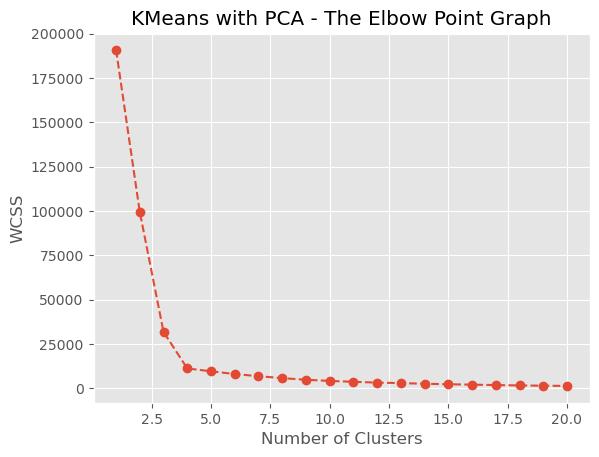

In [112]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# fit k-means using the transformed data from PCA 
wcss = []
# for loop to find the wcss value
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)
    
    
# determine the optimal number of clusters using Elbow method
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.title('KMeans with PCA - The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

# Implementation of kmeans using PCA with 10 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scores_pca)

### Results

In [113]:
# map the cust_df dataframe with the asigned clusters and PCA scores
cust_df_kmeans = pd.concat([cust_df, pd.DataFrame(scores_pca)], axis = 1)
cust_df_kmeans.columns.values[-12:] = ['component_1', 'component_2', 'component_3', 'component_4', 'component_5',
                                       'component_6', 'component_7', 'component_8', 'component_9', 'component_10',
                                       'component_11', 'component_12']
cust_df_kmeans['segment'] = kmeans.labels_

display(cust_df_kmeans.head())

,customer_index,total_orders,total_products,avg_product_per_order,avg_unique_product_per_order,avg_sellers_dealt_per_order,total_price,avg_price_per_order,total_freight_value,avg_freight_value_per_order,avg_installment_per_order,avg_payment_installments_boleto,avg_payment_installments_credit_card,avg_payment_installments_debit_card,avg_payment_installments_not_defined,avg_payment_installments_voucher,avg_payment_value_boleto,avg_payment_value_credit_card,avg_payment_value_debit_card,avg_payment_value_not_defined,avg_payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,no_payment_type,total_unique_products,total_sellers_dealt,customer_zip_code_prefix,geolocation_lat,geolocation_lng,total_orders_2016,total_orders_2017,total_orders_2018,avg_orders_per_month_2017,avg_orders_per_month_2018,avg_orders_3M_2017,avg_orders_3M_2018,avg_orders_6M_2017,avg_orders_6M_2018,total_orders_night,total_orders_morning,total_orders_afternoon,total_orders_evening,total_review_count,avg_review_score,avg_review_msg_length,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,segment
0,0,1,1,1,1,1,129.90,129.90,12.00,12.00,8,0,8,0,0,0,0.0,141.90,0.0,0.0,0.0,0,1,0,0,0,1,1,1,7787,-23.335331,-46.828647,0,0,1,0.000000,0.083333,0.00,0.25,0.0,0.5,0,1,0,0,1,5.0,111.0,0,1,0,0,0,0,1,0,0,0,-1.123631,0.088931,1
1,1,1,1,1,1,1,18.90,18.90,8.29,8.29,1,0,1,0,0,0,0.0,27.19,0.0,0.0,0.0,0,1,0,0,0,1,1,1,6053,-23.567395,-46.792957,0,0,1,0.000000,0.083333,0.00,0.25,0.0,0.5,0,1,0,0,1,4.0,0.0,0,1,0,0,0,0,1,0,0,0,-0.897561,-0.312580,1
2,2,1,1,1,1,1,69.00,69.00,17.22,17.22,8,0,8,0,0,0,0.0,86.22,0.0,0.0,0.0,0,1,0,0,0,1,1,1,88115,-27.543787,-48.625680,0,1,0,0.083333,0.000000,0.25,0.00,0.5,0.0,0,0,0,1,1,3.0,0.0,0,1,0,0,0,0,1,0,0,0,0.443147,1.231123,2
3,3,1,1,1,1,1,25.99,25.99,17.63,17.63,4,0,4,0,0,0,0.0,43.62,0.0,0.0,0.0,0,1,0,0,0,1,1,1,66812,-1.311011,-48.482884,0,1,0,0.083333,0.000000,0.25,0.00,0.5,0.0,0,0,0,1,1,4.0,12.0,0,1,0,0,0,0,1,0,0,0,0.557883,1.042243,2
4,4,1,1,1,1,1,180.00,180.00,16.89,16.89,6,0,6,0,0,0,0.0,196.89,0.0,0.0,0.0,0,1,0,0,0,1,1,1,18040,-23.504368,-47.466156,0,1,0,0.083333,0.000000,0.25,0.00,0.5,0.0,0,0,0,1,1,5.0,0.0,0,1,0,0,0,0,1,0,0,0,0.453736,1.178941,2


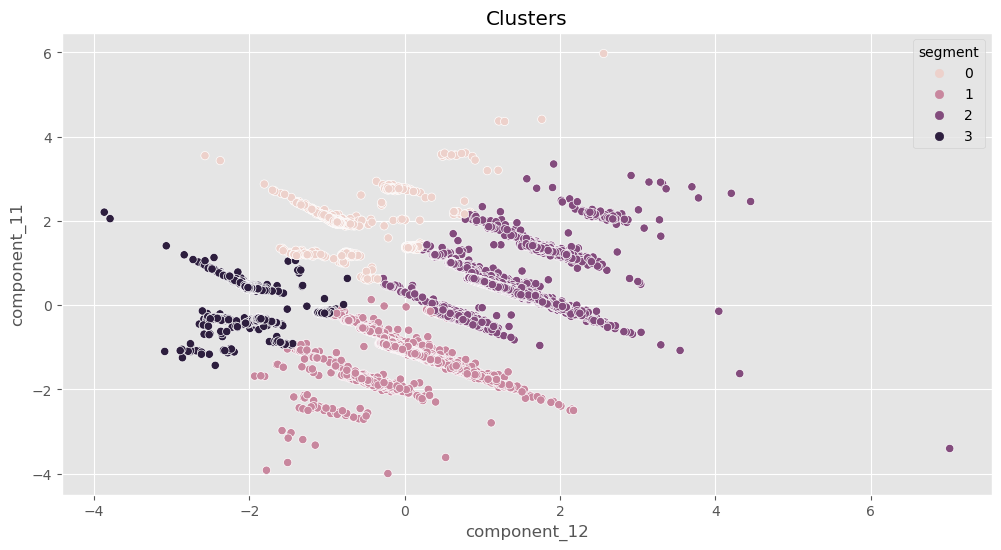

In [140]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Visualize clusters using the two components
sns.scatterplot(cust_df_kmeans['component_12'], cust_df_kmeans['component_11'], hue = cust_df_kmeans['segment'])
plt.title('Clusters')
plt.show()

## 5 Result Evaluation + Interpretation

In [115]:
from sklearn.metrics import silhouette_score

#To calculate the overall silhouette score
#Should be between -1 to 1. 1 indicates that the points belongs to correct cluster.
silhouette = silhouette_score(scores_pca, kmeans.labels_)
print("Silhouette score: {:.4f}".format(silhouette))

Silhouette score: 0.8341


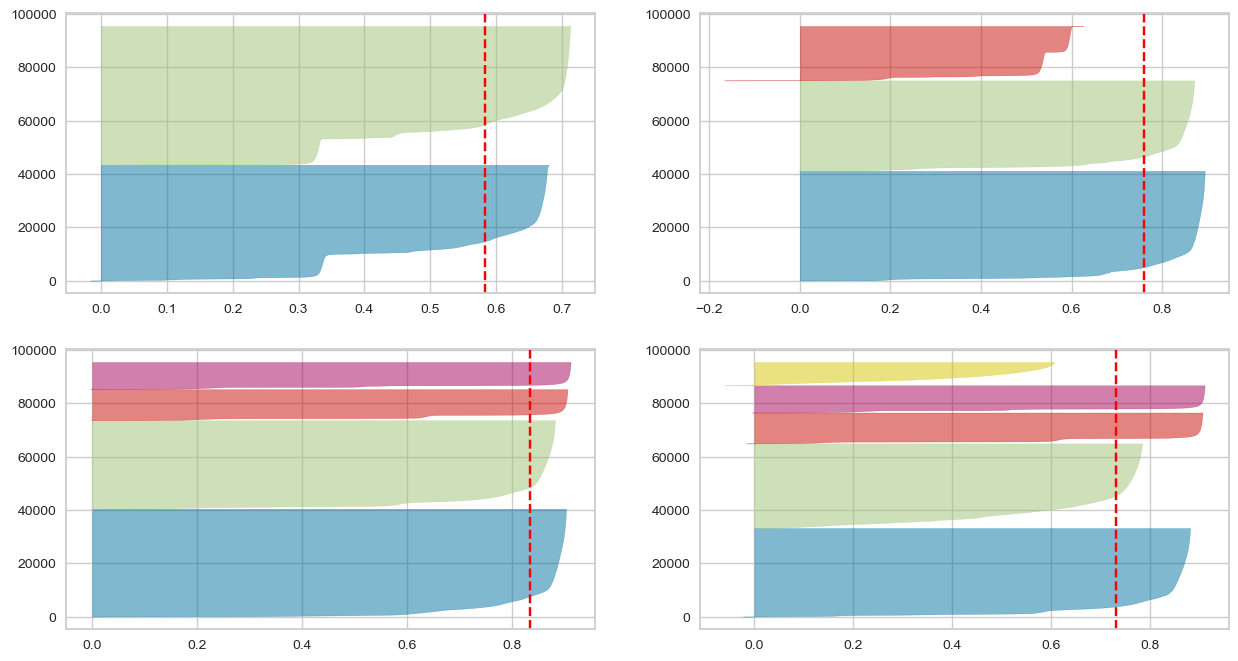

In [154]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scores_pca) 

The silhouette score is relatively high, stating that the clusters are very dense and well separated from other clusters.

The value of n_clusters as 2, 3 and 5 looks to be suboptimal for the given data due to the presence of clusters with below average silhouette scores (i.e. 0.83) and wide fluctuations in the size of the silhouette plots.
The value of 4 n_clusters looks optimal as the silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster is also a deciding point. For plot with n_cluster 4, the thickness is more uniform than the others n_clusters. Thus, one can select the optimal number of clusters is 4.

In [116]:
from sklearn import metrics

#To calculate the overall calinski harabasz score
#Higher value indicates that the clustering model is better.
calinski = metrics.calinski_harabasz_score(scores_pca, kmeans.labels_)
print("Calinski-Harabasz index: {:.4f}".format(calinski))

Calinski-Harabasz index: 510596.8178


The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.

In [117]:
from sklearn.metrics import davies_bouldin_score

#To calculate the overall davies bouldin score
#The lower the value, the better the model's performance.
davies = davies_bouldin_score(scores_pca, kmeans.labels_)
print("Davies-Bouldin index: {:.4f}".format(davies))

Davies-Bouldin index: 0.2344


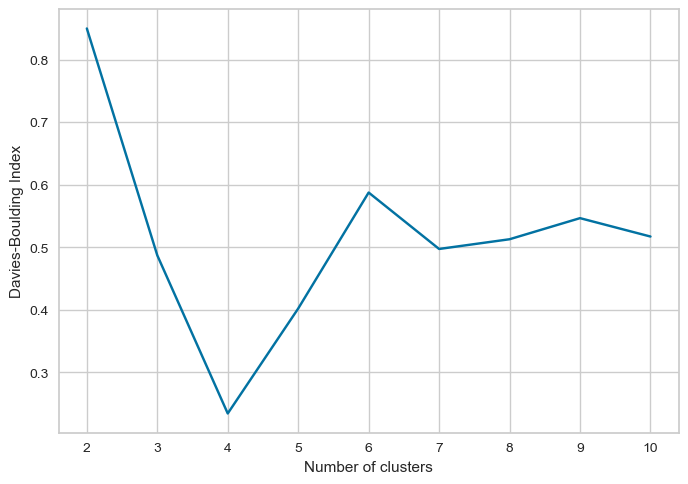

In [153]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(scores_pca)
    db_index = davies_bouldin_score(scores_pca, kmeans.labels_)
    results.update({i: db_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

Davies-Bouldin index is a validation metric that is often used in order to evaluate the optimal number of clusters to use. It is defined as a ratio between the cluster scatter and the cluster’s separation and a lower value will mean that the clustering is better. To visualize it, we can still observe that choosing 4 clusters minimizes the similarity measure.

Based on the evaluation of the clustering algorithm uisng the silhouette score, Calinski-Harabasz index, and Davies-Bouldin index, it can be inferred that the clustering of the data created by the PCA is good. The higher silhouette score indicates that the data points are well matched to their own clusters and the higher Calinski-Harabasz index indicates that the clusters are well separated and compact. However, the lower Davies-Bouldin index indicates that the clusters have good separation and low similarity between neighboring clusters. 

## 6 Members’ Contribution

#### Hilary Lim Yu Xuan (S2155659)
- Slides preparation and presentation
- Data Pre-processing Olist Seller dataset
- EDA for seller section, customer level section
- Cleaning, standardizing and arranging codebook for presentation
- Evaluation and Interpretation on Result Outcome

#### Navaneeta A/P P Shanmugam (S2192763)
- Slides preparation and presentation
- Data pre-processing Olist Review Dataset
- EDA for customer level section
- Evaluation for modelling
- Interpretation on the result outcome

#### Ze Li (S2192050)
- Slides preparation 
- Data pre-processing Olist Product Dataset
- EDA for product level section
- CRISP-DM